In [1]:
pip install utility

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: mlnx-tools -5.2.0- has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mlnx-tools or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


Mutation Frequency calculation

In [1]:
#Perform authentication to GISAID database using login credentials
from outbreak_data import authenticate_user
authenticate_user.authenticate_new_user()

Please open this url in a web browswer and authenticate with your GISAID credentials:  https://gpsapi.epicov.org/epi3/gps_authenticate/IMOXOBTHWNPKMNZODWRCURQHPDCPRRPUZZISMHYXZGXFXXVPBPRJJRFFQUPYJLMTTYLFZHAVAHBIEXNLAMVKTBUDGDFHHNQSVRXTLXKQYJSNSHLXRXSDFHQADCKMMYLA
Waiting for authorization response... [Press Ctrl-C to abort]
Authenication failed, trying again in 5 seconds...
Waiting for authorization response... [Press Ctrl-C to abort]
Authenication failed, trying again in 5 seconds...
Waiting for authorization response... [Press Ctrl-C to abort]
Authenication failed, trying again in 5 seconds...
Waiting for authorization response... [Press Ctrl-C to abort]
Authenication failed, trying again in 5 seconds...
Waiting for authorization response... [Press Ctrl-C to abort]
Authenticated successfully!

    TERMS OF USE for Python Package and
    Reminder of GISAID's Database Access Agreement
    Your ability to access and use Data in GISAID, including your access and
    use of same via R Pac

In [2]:
#For getting mutation count for a list of mutations
# Import outbreak_data package
from outbreak_data import outbreak_data as od
import pandas as pd

# List of mutations
mutations_list = ['ORF1a:H5944Y','ORF1a:R7030G','ORF1a:G6890D','ORF1a:I6758M','ORF1a:L6892M','ORF1a:G6338V','ORF1a:V5212V','ORF1a:L4967S','ORF1a:S5039T']

# Assuming od is an object that has the mutations_by_lineage method
# Replace 'od' with the actual object name
   
# Dictionary to store mutation counts
mutation_counts = {}
total_mutation_count = {}
    
# Loop over each mutation and get the count
for mutation in mutations_list:
    lin_data = od.mutations_by_lineage(mutation)
    
    # Check if lin1 is a DataFrame
    if isinstance(lin_data, pd.DataFrame):
        # Check if 'count' is a column in lin1
        if 'mutation_count' in lin_data.columns:
            # Calculate the sum of the mutation count column\n",
            total_mutation_count = lin_data['mutation_count'].sum()
   
    # Store the mutation count in the dictionary
    mutation_counts[mutation] = total_mutation_count
    
# Print or use the mutation counts as needed
for mutation, count in mutation_counts.items():
    print(f"Mutation: {mutation}, Count: {count}")
   
# Create a DataFrame from the dictionary
result_df = pd.DataFrame(list(mutation_counts.items()), columns=['Mutation', 'Count'])
result_df
# Save the DataFrame to an Excel file
result_df.to_excel('/raid/home/smrutip/smruti_project/mutation_counts_orf1ab_1.xlsx', index=False)

https://api.outbreak.info/genomics/mutations-by-lineage?mutations=ORF1a:H5944Y
https://api.outbreak.info/genomics/mutations-by-lineage?mutations=ORF1a:R7030G
https://api.outbreak.info/genomics/mutations-by-lineage?mutations=ORF1a:G6890D
https://api.outbreak.info/genomics/mutations-by-lineage?mutations=ORF1a:I6758M
https://api.outbreak.info/genomics/mutations-by-lineage?mutations=ORF1a:L6892M
https://api.outbreak.info/genomics/mutations-by-lineage?mutations=ORF1a:G6338V
https://api.outbreak.info/genomics/mutations-by-lineage?mutations=ORF1a:V5212V
https://api.outbreak.info/genomics/mutations-by-lineage?mutations=ORF1a:L4967S
https://api.outbreak.info/genomics/mutations-by-lineage?mutations=ORF1a:S5039T
Mutation: ORF1a:H5944Y, Count: {}
Mutation: ORF1a:R7030G, Count: {}
Mutation: ORF1a:G6890D, Count: {}
Mutation: ORF1a:I6758M, Count: {}
Mutation: ORF1a:L6892M, Count: {}
Mutation: ORF1a:G6338V, Count: {}
Mutation: ORF1a:V5212V, Count: {}
Mutation: ORF1a:L4967S, Count: {}
Mutation: ORF1a:S

Plot generation with statistics calculation

In [3]:
# Read Data 
import pandas as pd
    
sample = pd.read_excel("/raid/home/smrutip/smruti_project/COVID_final_mastersheet.xlsx")
sample_1 = pd.read_excel("/raid/home/smrutip/smruti_project/all_genes_esm_scores.xlsx")
   
# Calculate the correlation between two columns
correlation_coefficient = sample_1['accumulated_gain'].corr(sample_1['esm_score'])
print(f"Correlation coefficient between accumulated_gain and esm_score: {correlation_coefficient}")

# Calculate the correlation between two columns
correlation_coefficient = sample['mutation count'].corr(sample['accumulated_gain'])
print(f"Correlation coefficient between mutation count and accumulated_gain: {correlation_coefficient}")
  
# Calculate the correlation between two columns
correlation_coefficient = sample_1['mutation count'].corr(sample_1['esm_score'])
print(f"Correlation coefficient between mutation count and esm_score: {correlation_coefficient}")
    
# Calculate the correlation between two columns
correlation_coefficient = sample['mutation freq'].corr(sample['accumulated_gain'])
print(f"Correlation coefficient between mutation freq and accumulated_gain: {correlation_coefficient}")
   
# Calculate the correlation between two columns
correlation_coefficient = sample_1['mutation freq'].corr(sample_1['esm_score'])
print(f"Correlation coefficient between mutation freq and esm_score: {correlation_coefficient}")
    
# Calculate the correlation between two columns
correlation_coefficient = sample_1['mutation freq'].corr(sample_1['mutation count'])
print(f"Correlation coefficient between mutation freq and mutation count: {correlation_coefficient}")

Correlation coefficient between accumulated_gain and esm_score: -0.007908256385918714
Correlation coefficient between mutation count and accumulated_gain: 0.016485557269817232
Correlation coefficient between mutation count and esm_score: -0.019934786001674136
Correlation coefficient between mutation freq and accumulated_gain: 0.008494854934404989
Correlation coefficient between mutation freq and esm_score: 0.0012218981545105486
Correlation coefficient between mutation freq and mutation count: 0.43516134133959905


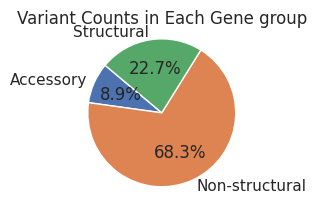

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from Excel file
df = pd.read_excel('/raid/home/smrutip/smruti_project/COVID_final_mastersheet.xlsx')
    
# Count the number of variants in each gene group
variant_counts = df['Gene groups'].value_counts()
    
# Sort variant counts by gene group
variant_counts = variant_counts.sort_index()
    
# Plot pie chart
plt.figure(figsize=(2.1, 2.1))
plt.pie(variant_counts.values, labels=variant_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Variant Counts in Each Gene group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
#plt.savefig("7_pie.pdf", dpi=600)
plt.show()

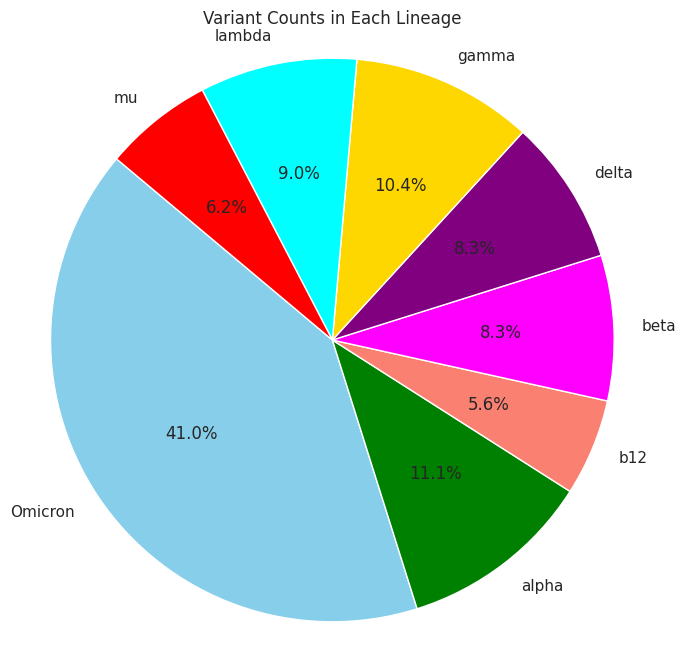

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from Excel file
df = pd.read_excel('/raid/home/smrutip/smruti_project/lineages_count.xlsx')

# Count the number of variants in each lineage
variant_counts = df['Lineage'].value_counts()
    
# Sort variant counts by lineage
variant_counts = variant_counts.sort_index()
    
# Define custom colors for each lineage
custom_colors = ['skyblue', 'green', 'salmon', 'magenta', 'purple', 'gold', 'cyan', 'red']

# Plot pie chart\n",
plt.figure(figsize=(8, 8))
plt.pie(variant_counts.values, labels=variant_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Variant Counts in Each Lineage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.savefig("6_pie.pdf", dpi=600)
plt.show()

In [ ]:
import pandas as pd\n",
    "import matplotlib.pyplot as plt\n",
    "import numpy as np\n",
    "\n",
    "# Read data from Excel file\n",
    "df = pd.read_excel('/raid/home/smrutip/smruti_project/COVID_final_mastersheet.xlsx')\n",
    "\n",
    "# Define gene groups\n",
    "structural_genes = ['S', 'E', 'M', 'N']\n",
    "non_structural_genes = ['ORF1ab']\n",
    "accessory_genes = ['ORF10', 'ORF3a', 'ORF6', 'ORF7a', 'ORF7b', 'ORF8']  # Add your accessory genes here\n",
    "\n",
    "# Create a new column to categorize genes\n",
    "def categorize_gene(gene):\n",
    "    if gene in structural_genes:\n",
    "        return 'Structural'\n",
    "    elif gene in non_structural_genes:\n",
    "        return 'Non-Structural'\n",
    "    elif gene in accessory_genes:\n",
    "        return 'Accessory'\n",
    "\n",
    "df['Gene Group'] = df['Gene'].apply(categorize_gene)\n",
    "\n",
    "# Group by lineage and gene group and calculate variant counts\n",
    "# grouped_df = df.groupby(['Gene Group', 'Classification']).size().unstack(fill_value=0)\n",
    "\n",
    "grouped_df = df.groupby(['Gene Group', 'Classification']).size().unstack(fill_value=0)\n",
    "\n",
    "grouped_df.loc[\"Accessory\", :] = np.log(grouped_df.loc[\"Accessory\", :])/np.log(grouped_df.loc[\"Accessory\", :].sum())\n",
    "grouped_df.loc[\"Non-Structural\", :] = np.log(grouped_df.loc[\"Non-Structural\", :])/np.log(grouped_df.loc[\"Non-Structural\", :].sum())\n",
    "grouped_df.loc[\"Structural\", :] = np.log(grouped_df.loc[\"Structural\", :])/np.log(grouped_df.loc[\"Structural\", :].sum())\n",
    "\n",
    "\n",
    "# Plot stacked bar plot\n",
    "plt.figure(dpi = 600, figsize=(2.1, 2.1))\n",
    "#fig, ax = plt.subplots(1,1, dpi = 600, figsize = (2.1,2.1))\n",
    "ax = grouped_df.plot(kind='barh', stacked=True)\n",
    "# Annotate each bar with its count\n",
    "for patch in ax.patches:\n",
    "    width = patch.get_width()\n",
    "    height = patch.get_height()\n",
    "    x, y = patch.get_xy()\n",
    "    # ax.annotate(f'{int(width)}', (x + width/2, y + height/2), \n",
    "    #             ha='center', va='center', color='white', fontweight='bold')\n",
    "\n",
    "plt.title('Variant Counts (log scale) and Gene groups by Classification')\n",
    "plt.ylabel('Gene groups')\n",
    "plt.xlabel('Variant Counts (log scale)')\n",
    "#plt.xticks(rotation=45)\n",
    "plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')\n",
    "# Remove top and right spines\n",
    "plt.gca().spines['top'].set_visible(False)\n",
    "plt.gca().spines['right'].set_visible(False)\n",
    "#plt.show()\n",
    "plt.savefig(\"8.pdf\", dpi =600)

Kruskal-Wallis Test p-value between Control and all other groups: 0.8981707513854493
Kruskal-Wallis Test p-value between Variant and all other groups: 0.00047329625261378195
One-sided Mann-Whitney U Test p-value for Variant vs Control: 0.9997714857854783


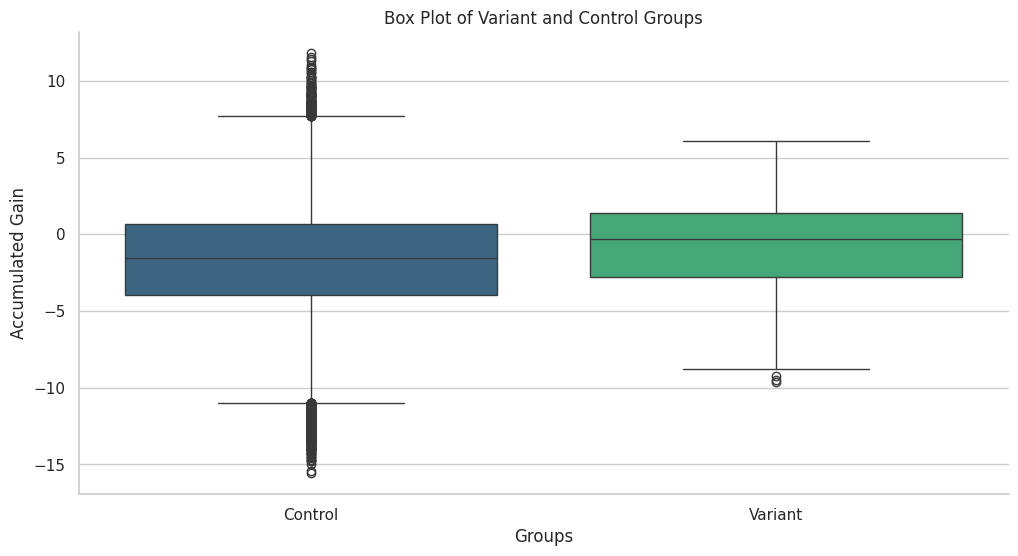

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal, mannwhitneyu

# Assuming 'data' is your dataset
df = pd.read_excel("/raid/home/smrutip/smruti_project/COVID_final_mastersheet.xlsx")
#df = sample.copy()

# Create a new column 'group' to categorize classifications
df['group'] = df['Classification'].apply(lambda x: 'Variant' if x in ['VOC', 'VOI'] else 'Control')
    
# Using seaborn for a more visually appealing plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
    
# Get the order of groups based on their median AG score
group_order = df.groupby('group')['accumulated_gain'].median().sort_values().index
    
# Creating a box plot with groups ordered by median AG score
sns.boxplot(x='group', y='accumulated_gain', data=df, order=group_order, hue='group', palette='viridis')
    
# Perform Kruskal-Wallis test between groups
groups = df['group'].unique()
for group in groups:
    data = df[df['group'] == group]['accumulated_gain']
    statistic, p_value = kruskal(data, df['accumulated_gain'])
    print(f"Kruskal-Wallis Test p-value between {group} and all other groups:", p_value)
    
# Perform Mann-Whitney U test between variant and control groups
variant_data = df[df['group'] == 'Variant']['accumulated_gain']
control_data = df[df['group'] == 'Control']['accumulated_gain']
statistic, p_value = mannwhitneyu(variant_data, control_data, alternative='less')
print("One-sided Mann-Whitney U Test p-value for Variant vs Control:", p_value)
    
# Adding labels and title
plt.xlabel('Groups')
plt.ylabel('Accumulated Gain')
plt.title('Box Plot of Variant and Control Groups')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.show()

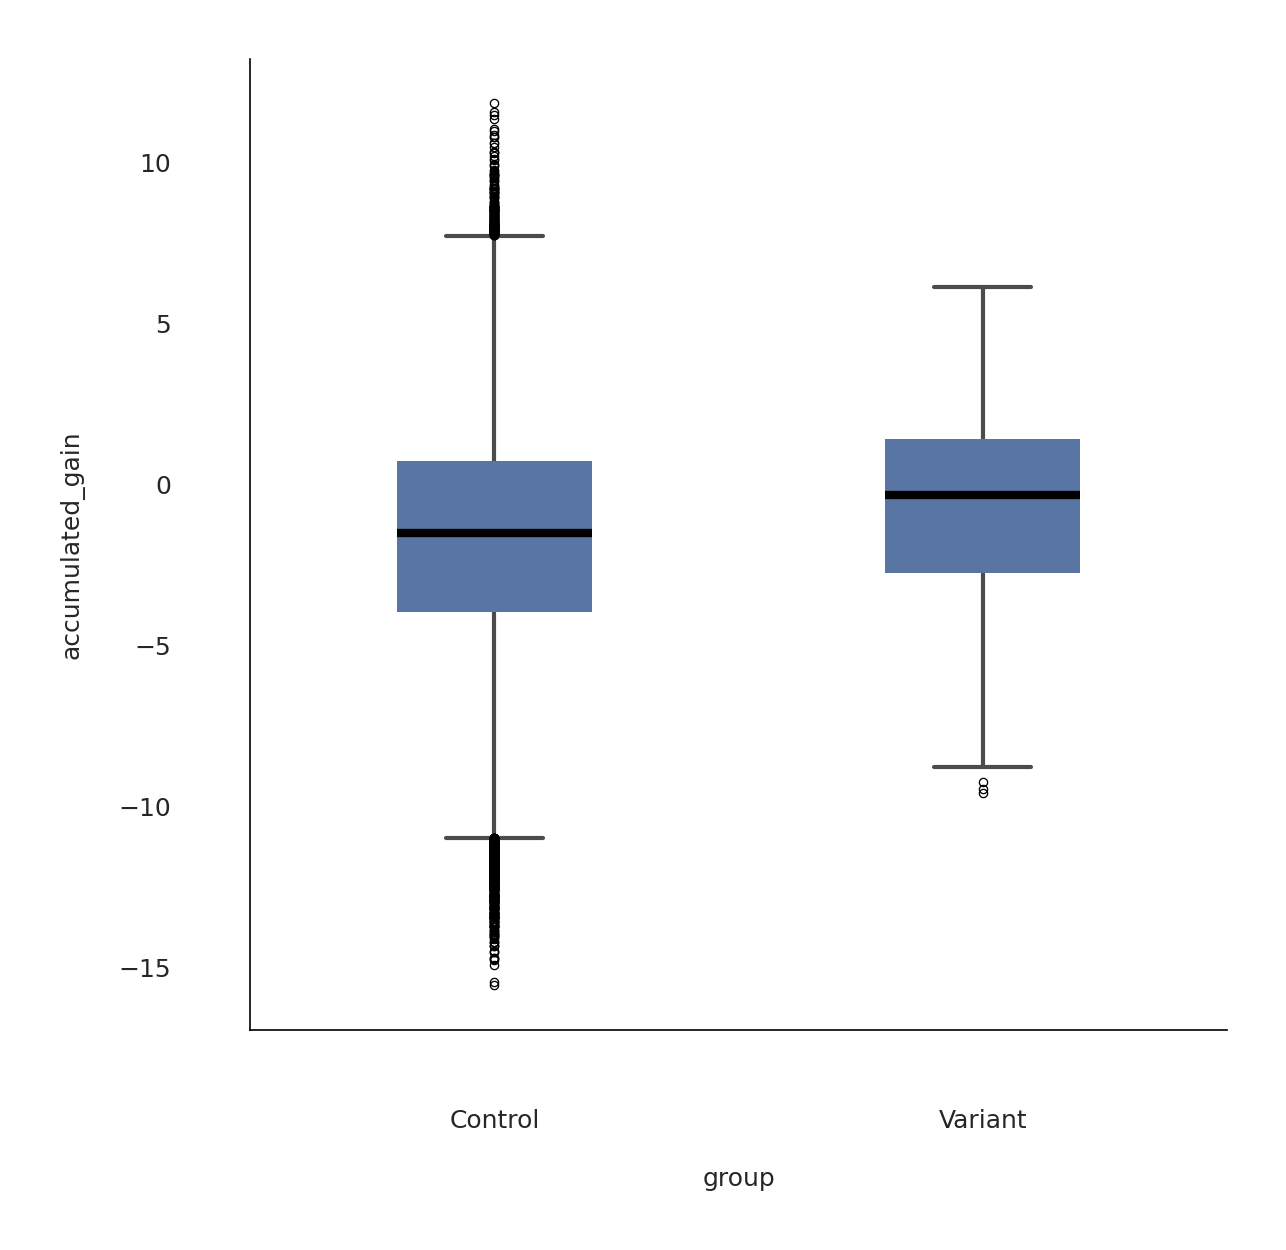

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal, mannwhitneyu
import utility

# Assuming 'data' is your dataset
df = pd.read_excel("/raid/home/smrutip/smruti_project/COVID_final_mastersheet.xlsx")
#df = sample.copy()

# Create a new column 'group' to categorize classifications
df['group'] = df['Classification'].apply(lambda x: 'Variant' if x in ['VOC', 'VOI'] else 'Control')

# Using seaborn for a more visually appealing plot
# sns.set(style="whitegrid")
# plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(1,1, dpi = 600, figsize = (2.1,2.1))

# Get the order of groups based on their median AG score
# group_order = df.groupby('group')['accumulated_gain'].median().sort_values().index

ax = utility.box_plot(data = df, x = "group", y='accumulated_gain', ax = ax)
ax = utility.custom_figure_axis(ax=ax, fontsize = 3, rotation=0, show_ticks=True)

plt.savefig("1.pdf", dpi =600)
    
# Creating a box plot with groups ordered by median AG score
#ax = sns.boxplot(x='group', y='accumulated_gain', data=df, order=group_order, hue='group', palette='viridis', ax=ax)

# # Perform Kruskal-Wallis test between groups
# groups = df['group'].unique()
# for group in groups:
#     data = df[df['group'] == group]['accumulated_gain']
#     statistic, p_value = kruskal(data, df['accumulated_gain'])
#     print(f\"Kruskal-Wallis Test p-value between {group} and all other groups:\", p_value)
    
# # Perform Mann-Whitney U test between variant and control groups\n",
# variant_data = df[df['group'] == 'Variant']['accumulated_gain']
# control_data = df[df['group'] == 'Control']['accumulated_gain']
# statistic, p_value = mannwhitneyu(variant_data, control_data, alternative='less')
# print("One-sided Mann-Whitney U Test p-value for Variant vs Control:", p_value)

# # Adding labels and title
# plt.xlabel('Groups')
# plt.ylabel('Accumulated Gain')
# plt.title('Box Plot of Variant and Control Groups')

# # Remove top and right spines
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# # Display the plot
# plt.show()

Mann-Whitney U Test p-value for Structural in VOC/VOI vs Controls: 0.02209241008997464
Mann-Whitney U Test p-value for Non-structural in VOC/VOI vs Controls: 0.2381640141445407
Mann-Whitney U Test p-value for Accessory in VOC/VOI vs Controls: 0.0031453773367315463


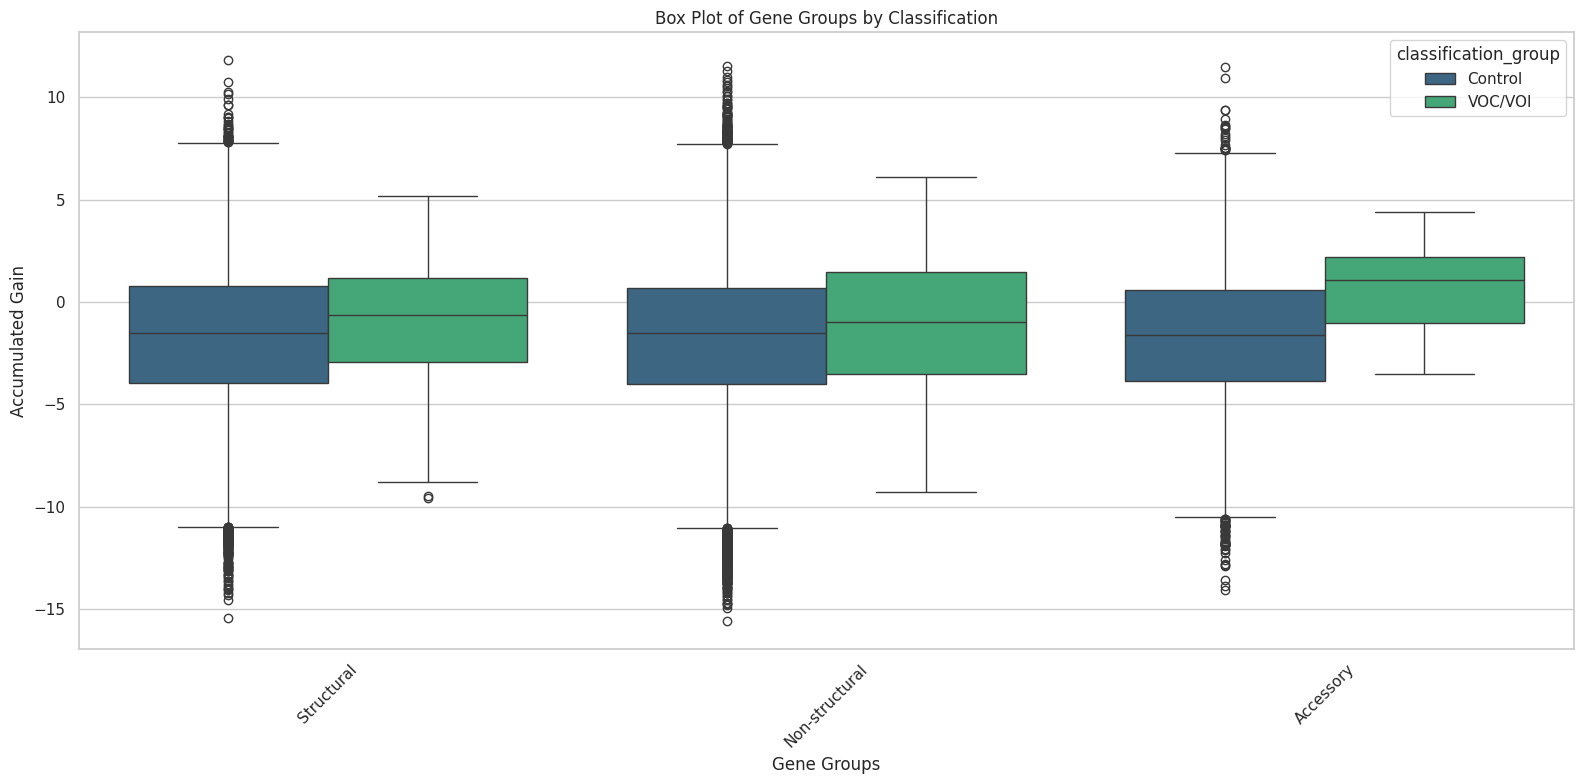

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Assuming 'data' is your dataset
df = pd.read_excel("/raid/home/smrutip/smruti_project/COVID_final_mastersheet.xlsx")
#df = final_data.copy()
# Create a new column 'classification_group' to categorize classifications
df['classification_group'] = df['Classification'].apply(lambda x: 'VOC/VOI' if x in ['VOC', 'VOI'] else 'Control')
    
# Define gene groups
structural_genes = ['S', 'E', 'M', 'N']
non_structural_gene = ['ORF1ab']
accessory_genes = df['Gene'].unique()
for gene in structural_genes + non_structural_gene:
    accessory_genes = accessory_genes[accessory_genes != gene]
    
# Map genes to groups
gene_group_mapping = {}
for gene in structural_genes:
    gene_group_mapping[gene] = 'Structural'
    gene_group_mapping[non_structural_gene[0]] = 'Non-structural'
    for gene in accessory_genes:
        gene_group_mapping[gene] = 'Accessory'
    
# Add a new column 'Gene_Group' to the DataFrame
df['Gene_Group'] = df['Gene'].map(gene_group_mapping)
    
# Using seaborn for a more visually appealing plot
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
    
# Define the order of classification groups
classification_order = ['Control', 'VOC/VOI']
    
# Define the order of gene groups within each classification group
gene_group_order_within_class = ['Structural', 'Non-structural', 'Accessory']
    
# Create a box plot with classification groups and gene groups
sns.boxplot(x='Gene_Group', y='accumulated_gain', hue='classification_group', data=df, order=gene_group_order_within_class, palette='viridis', hue_order=classification_order)
    
# Adding labels and title
plt.xlabel('Gene Groups')
plt.ylabel('Accumulated Gain')
plt.title('Box Plot of Gene Groups by Classification')
    
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
    
# Perform statistical tests for each gene group
for gene_group in gene_group_order_within_class:
    gene_group_data = df[df['Gene_Group'] == gene_group]
    voc_voi_data = gene_group_data[gene_group_data['classification_group'] == 'VOC/VOI']['accumulated_gain']
    controls_data = gene_group_data[gene_group_data['classification_group'] == 'Control']['accumulated_gain']
    
    # Perform Mann-Whitney U test
    statistic, p_value = mannwhitneyu(voc_voi_data, controls_data, alternative='two-sided')
    print(f"Mann-Whitney U Test p-value for {gene_group} in VOC/VOI vs Controls:", p_value)

# Display the plot
plt.tight_layout()
plt.show()

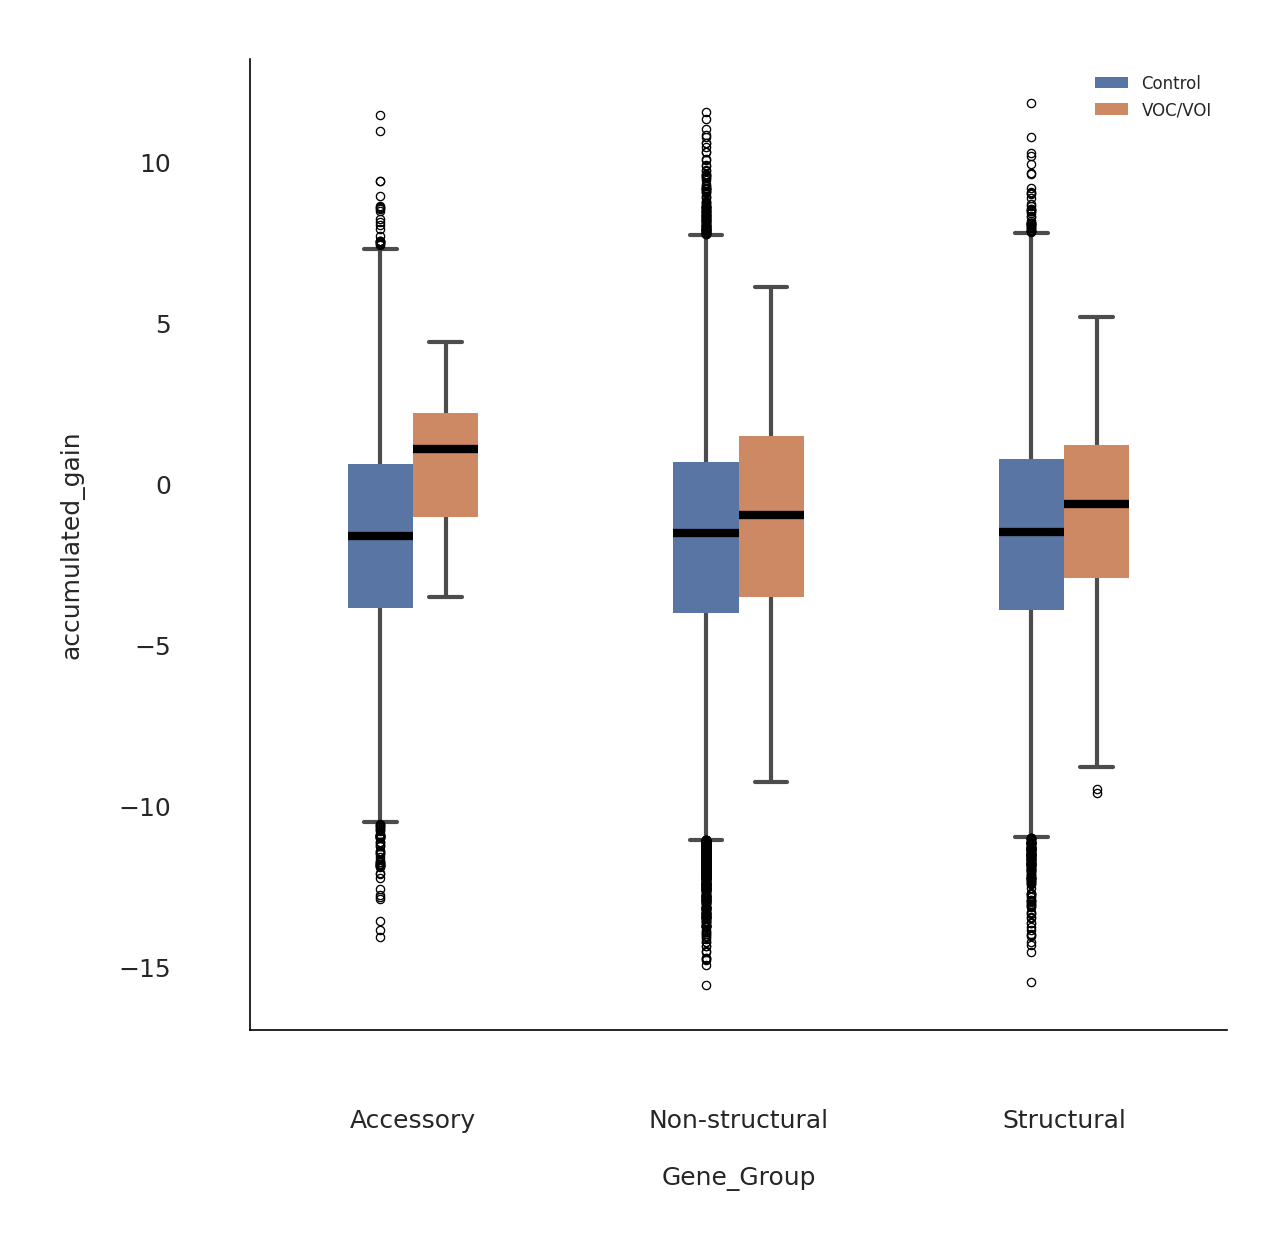

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import utility

# Assuming 'data' is your dataset
df = pd.read_excel("/raid/home/smrutip/smruti_project/COVID_final_mastersheet.xlsx")
#df = final_data.copy()
# Create a new column 'classification_group' to categorize classifications
df['classification_group'] = df['Classification'].apply(lambda x: 'VOC/VOI' if x in ['VOC', 'VOI'] else 'Control')
    
# Define gene groups
structural_genes = ['S', 'E', 'M', 'N']
non_structural_gene = ['ORF1ab']
accessory_genes = df['Gene'].unique()
for gene in structural_genes + non_structural_gene:
    accessory_genes = accessory_genes[accessory_genes != gene]
    
# Map genes to groups
gene_group_mapping = {}
for gene in structural_genes:
    gene_group_mapping[gene] = 'Structural'
gene_group_mapping[non_structural_gene[0]] = 'Non-structural'
for gene in accessory_genes:
        gene_group_mapping[gene] = 'Accessory'
    
# Add a new column 'Gene_Group' to the DataFrame
df['Gene_Group'] = df['Gene'].map(gene_group_mapping)
    
# # Using seaborn for a more visually appealing plot
# sns.set(style="whitegrid")
# plt.figure(figsize=(16, 8))
    
# # Define the order of classification groups
# classification_order = ['Control', 'VOC/VOI']
    
# # Define the order of gene groups within each classification group
# gene_group_order_within_class = ['Structural', 'Non-structural', 'Accessory']

fig, ax = plt.subplots(1,1, dpi = 600, figsize = (2.1,2.1))

ax = utility.box_plot(data = df, x = "Gene_Group", y='accumulated_gain', hue='classification_group', ax = ax)
ax = utility.custom_figure_axis(ax=ax, fontsize = 3, rotation=0, show_ticks=True)
ax.legend(fontsize=2, frameon=False)

#plt.savefig("2.pdf", dpi =600)

# Using seaborn for a more visually appealing plot
#sns.set(style="whitegrid")
#plt.figure(figsize=(16, 8))
    
# # Create a box plot with classification groups and gene groups
# sns.boxplot(x='Gene_Group', y='accumulated_gain', hue='classification_group', data=df, order=gene_group_order_within_class, palette='viridis', hue_order=classification_order)
    
# # Adding labels and title
# plt.xlabel('Gene Groups')
# plt.ylabel('Accumulated Gain')
# plt.title('Box Plot of Gene Groups by Classification')
    
# # Rotate x-axis labels for better visibility
# plt.xticks(rotation=45)
    
# # Perform statistical tests for each gene group
# for gene_group in gene_group_order_within_class:
#     gene_group_data = df[df['Gene_Group'] == gene_group]
#     voc_voi_data = gene_group_data[gene_group_data['classification_group'] == 'VOC/VOI']['accumulated_gain']
#     controls_data = gene_group_data[gene_group_data['classification_group'] == 'Control']['accumulated_gain']
    
#     # Perform Mann-Whitney U test
#     statistic, p_value = mannwhitneyu(voc_voi_data, controls_data, alternative='two-sided')
#     print(f"Mann-Whitney U Test p-value for {gene_group} in VOC/VOI vs Controls:", p_value)

# # Display the plot
# plt.tight_layout()
# plt.show()

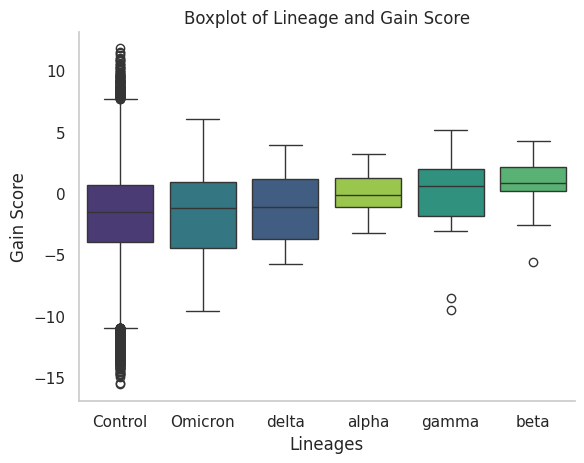

Mann-Whitney U test between Control and delta:
U Statistic: 301725.0, p-value: 0.6852620289116925
No significant difference found.
Mann-Whitney U test between Control and Omicron:
U Statistic: 1531905.5, p-value: 0.6215951583752508
No significant difference found.
Mann-Whitney U test between Control and gamma:
U Statistic: 303847.0, p-value: 0.09516702687758569
No significant difference found.
Mann-Whitney U test between Control and beta:
U Statistic: 184568.5, p-value: 0.009955475181059903
The difference is statistically significant.
Mann-Whitney U test between Control and alpha:
U Statistic: 296044.0, p-value: 0.029707363978348233
The difference is statistically significant.
Mann-Whitney U test between delta and Omicron:
U Statistic: 374.0, p-value: 0.764797557890574
No significant difference found.
Mann-Whitney U test between delta and gamma:
U Statistic: 74.0, p-value: 0.4494558273142166
No significant difference found.
Mann-Whitney U test between delta and beta:
U Statistic: 48.0,

In [40]:
# Read Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

sample = pd.read_excel("/raid/home/smrutip/smruti_project/lineage_vs_gain_score.xlsx")
                       
df = sample.copy()
    
# Calculate median gain score for each lineage group
median_gain_scores = df.groupby('Lineage')['accumulated_gain'].median().sort_values()
    
# Create boxplot
sns.boxplot(x='Lineage', y='accumulated_gain', data=df, order=median_gain_scores.index, hue='Lineage', palette='viridis')
plt.title('Boxplot of Lineage and Gain Score')
plt.xlabel('Lineages')
plt.ylabel('Gain Score')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Remove background lines
plt.grid(False)
plt.show()
    
# Perform Mann-Whitney U tests for all possible combinations
lineages = df['Lineage'].unique()
for i in range(len(lineages)):
    for j in range(i+1, len(lineages)):
        lineage1 = lineages[i]
        lineage2 = lineages[j]
        data1 = df[df['Lineage'] == lineage1]['accumulated_gain']
        data2 = df[df['Lineage'] == lineage2]['accumulated_gain']
        stat, p_value = mannwhitneyu(data1, data2)
        print(f"Mann-Whitney U test between {lineage1} and {lineage2}:")
        print(f"U Statistic: {stat}, p-value: {p_value}")
        if p_value < 0.05:
            print("The difference is statistically significant.")
        else:
            print("No significant difference found.")
    
# Perform Kruskal-Wallis test
lineages = df['Lineage'].unique()
data = [df[df['Lineage'] == lineage]['accumulated_gain'] for lineage in lineages]
stat, p_value = kruskal(*data)
print("Kruskal-Wallis Test:")
print(f"H statistic: {stat}, p-value: {p_value}")
    
# Interpret the results
if p_value < 0.05:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

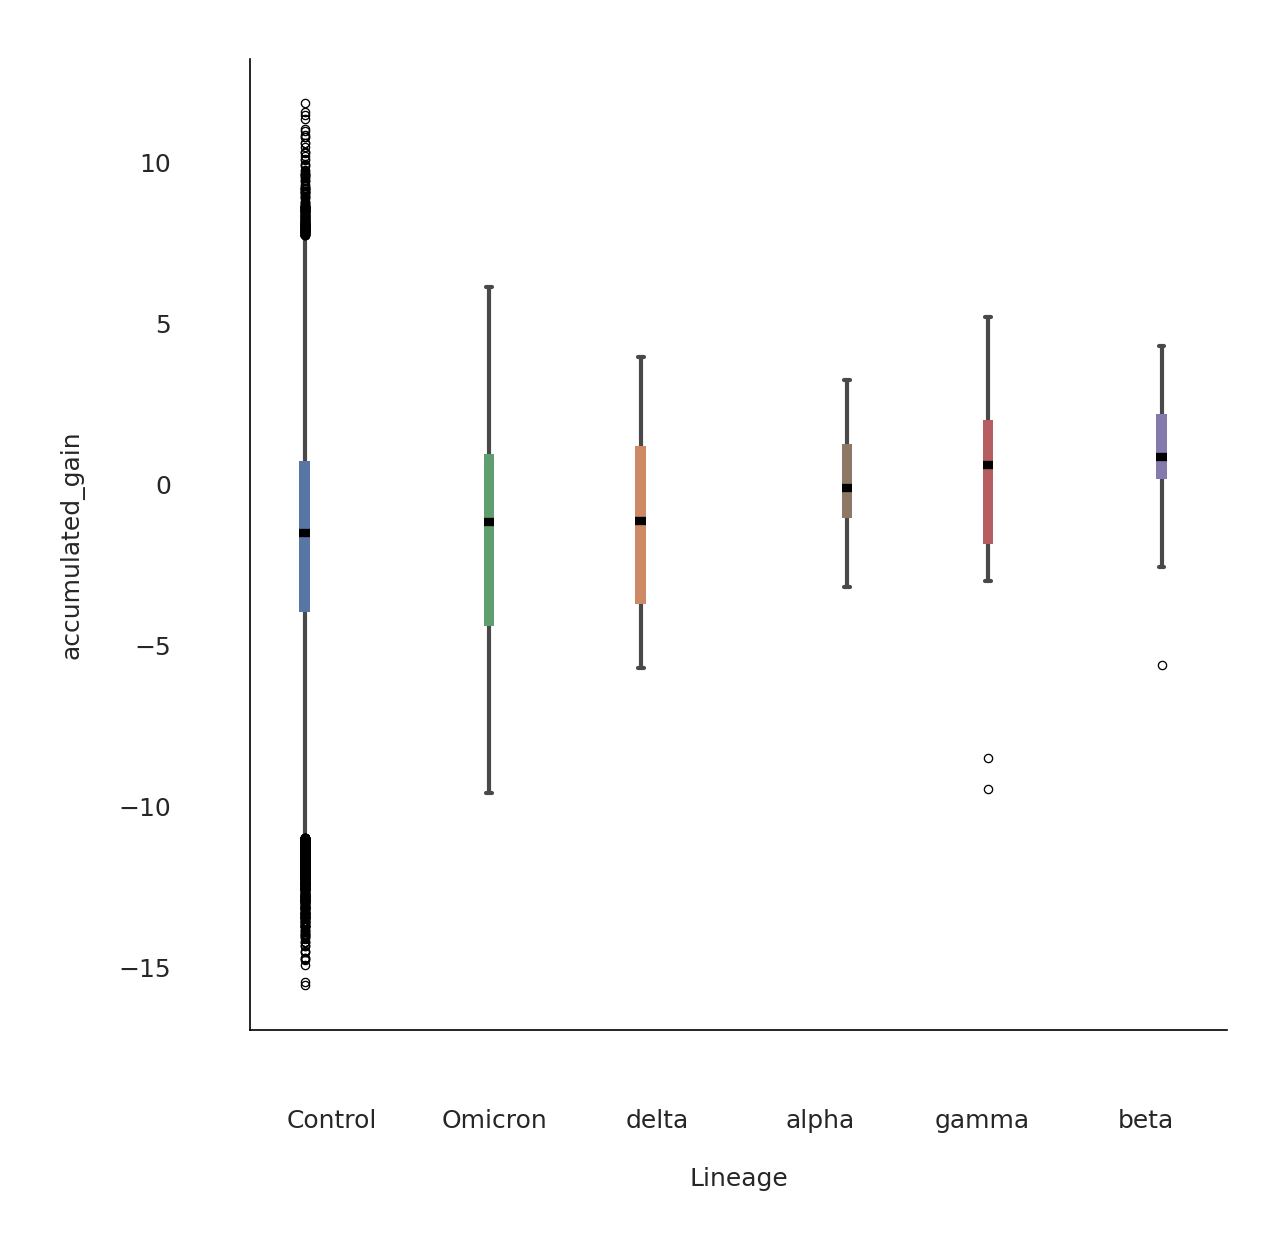

In [35]:
# Read Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

sample = pd.read_excel("/raid/home/smrutip/smruti_project/lineage_vs_gain_score.xlsx")
                       
df = sample.copy()
    
# Calculate median gain score for each lineage group
median_gain_scores = df.groupby('Lineage')['accumulated_gain'].median().sort_values()

fig, ax = plt.subplots(1,1, dpi = 600, figsize = (2.1,2.1))
    
ax = utility.box_plot(data = df, x = "Lineage", y='accumulated_gain', hue='Lineage', ax = ax)
ax = utility.custom_figure_axis(ax=ax, fontsize = 3, rotation=0, show_ticks=True)
#ax.legend(fontsize=2, frameon=False)\n",

#plt.savefig(\"4.pdf\", dpi =600)\n",
    
# # Create boxplot
# sns.boxplot(x='Lineage', y='accumulated_gain', data=df, order=median_gain_scores.index, hue='Lineage', palette='viridis')
# plt.title('Boxplot of Lineage and Gain Score')
# plt.xlabel('Lineages')
# plt.ylabel('Gain Score')

# # Remove top and right spines
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# plt.show()
    
# # Perform Mann-Whitney U tests for all possible combinations
# lineages = df['Lineage'].unique()
# for i in range(len(lineages)):
#     for j in range(i+1, len(lineages)):
#         lineage1 = lineages[i]
#         lineage2 = lineages[j]
#         data1 = df[df['Lineage'] == lineage1]['accumulated_gain']
#         data2 = df[df['Lineage'] == lineage2]['accumulated_gain']
#         stat, p_value = mannwhitneyu(data1, data2)
#         print(f"Mann-Whitney U test between {lineage1} and {lineage2}:")
#         print(f"U Statistic: {stat}, p-value: {p_value}")
#         if p_value < 0.05:
#             print("The difference is statistically significant.")
#         else:
#             print("No significant difference found.")
    
# # Perform Kruskal-Wallis test
# lineages = df['Lineage'].unique()
# data = [df[df['Lineage'] == lineage]['accumulated_gain'] for lineage in lineages]
# stat, p_value = kruskal(*data)
# print("Kruskal-Wallis Test:")
# print(f"H statistic: {stat}, p-value: {p_value}")
    
# # Interpret the results
# if p_value < 0.05:
#     print("There is a significant difference between the groups.")
# else:
#     print("There is no significant difference between the groups.")

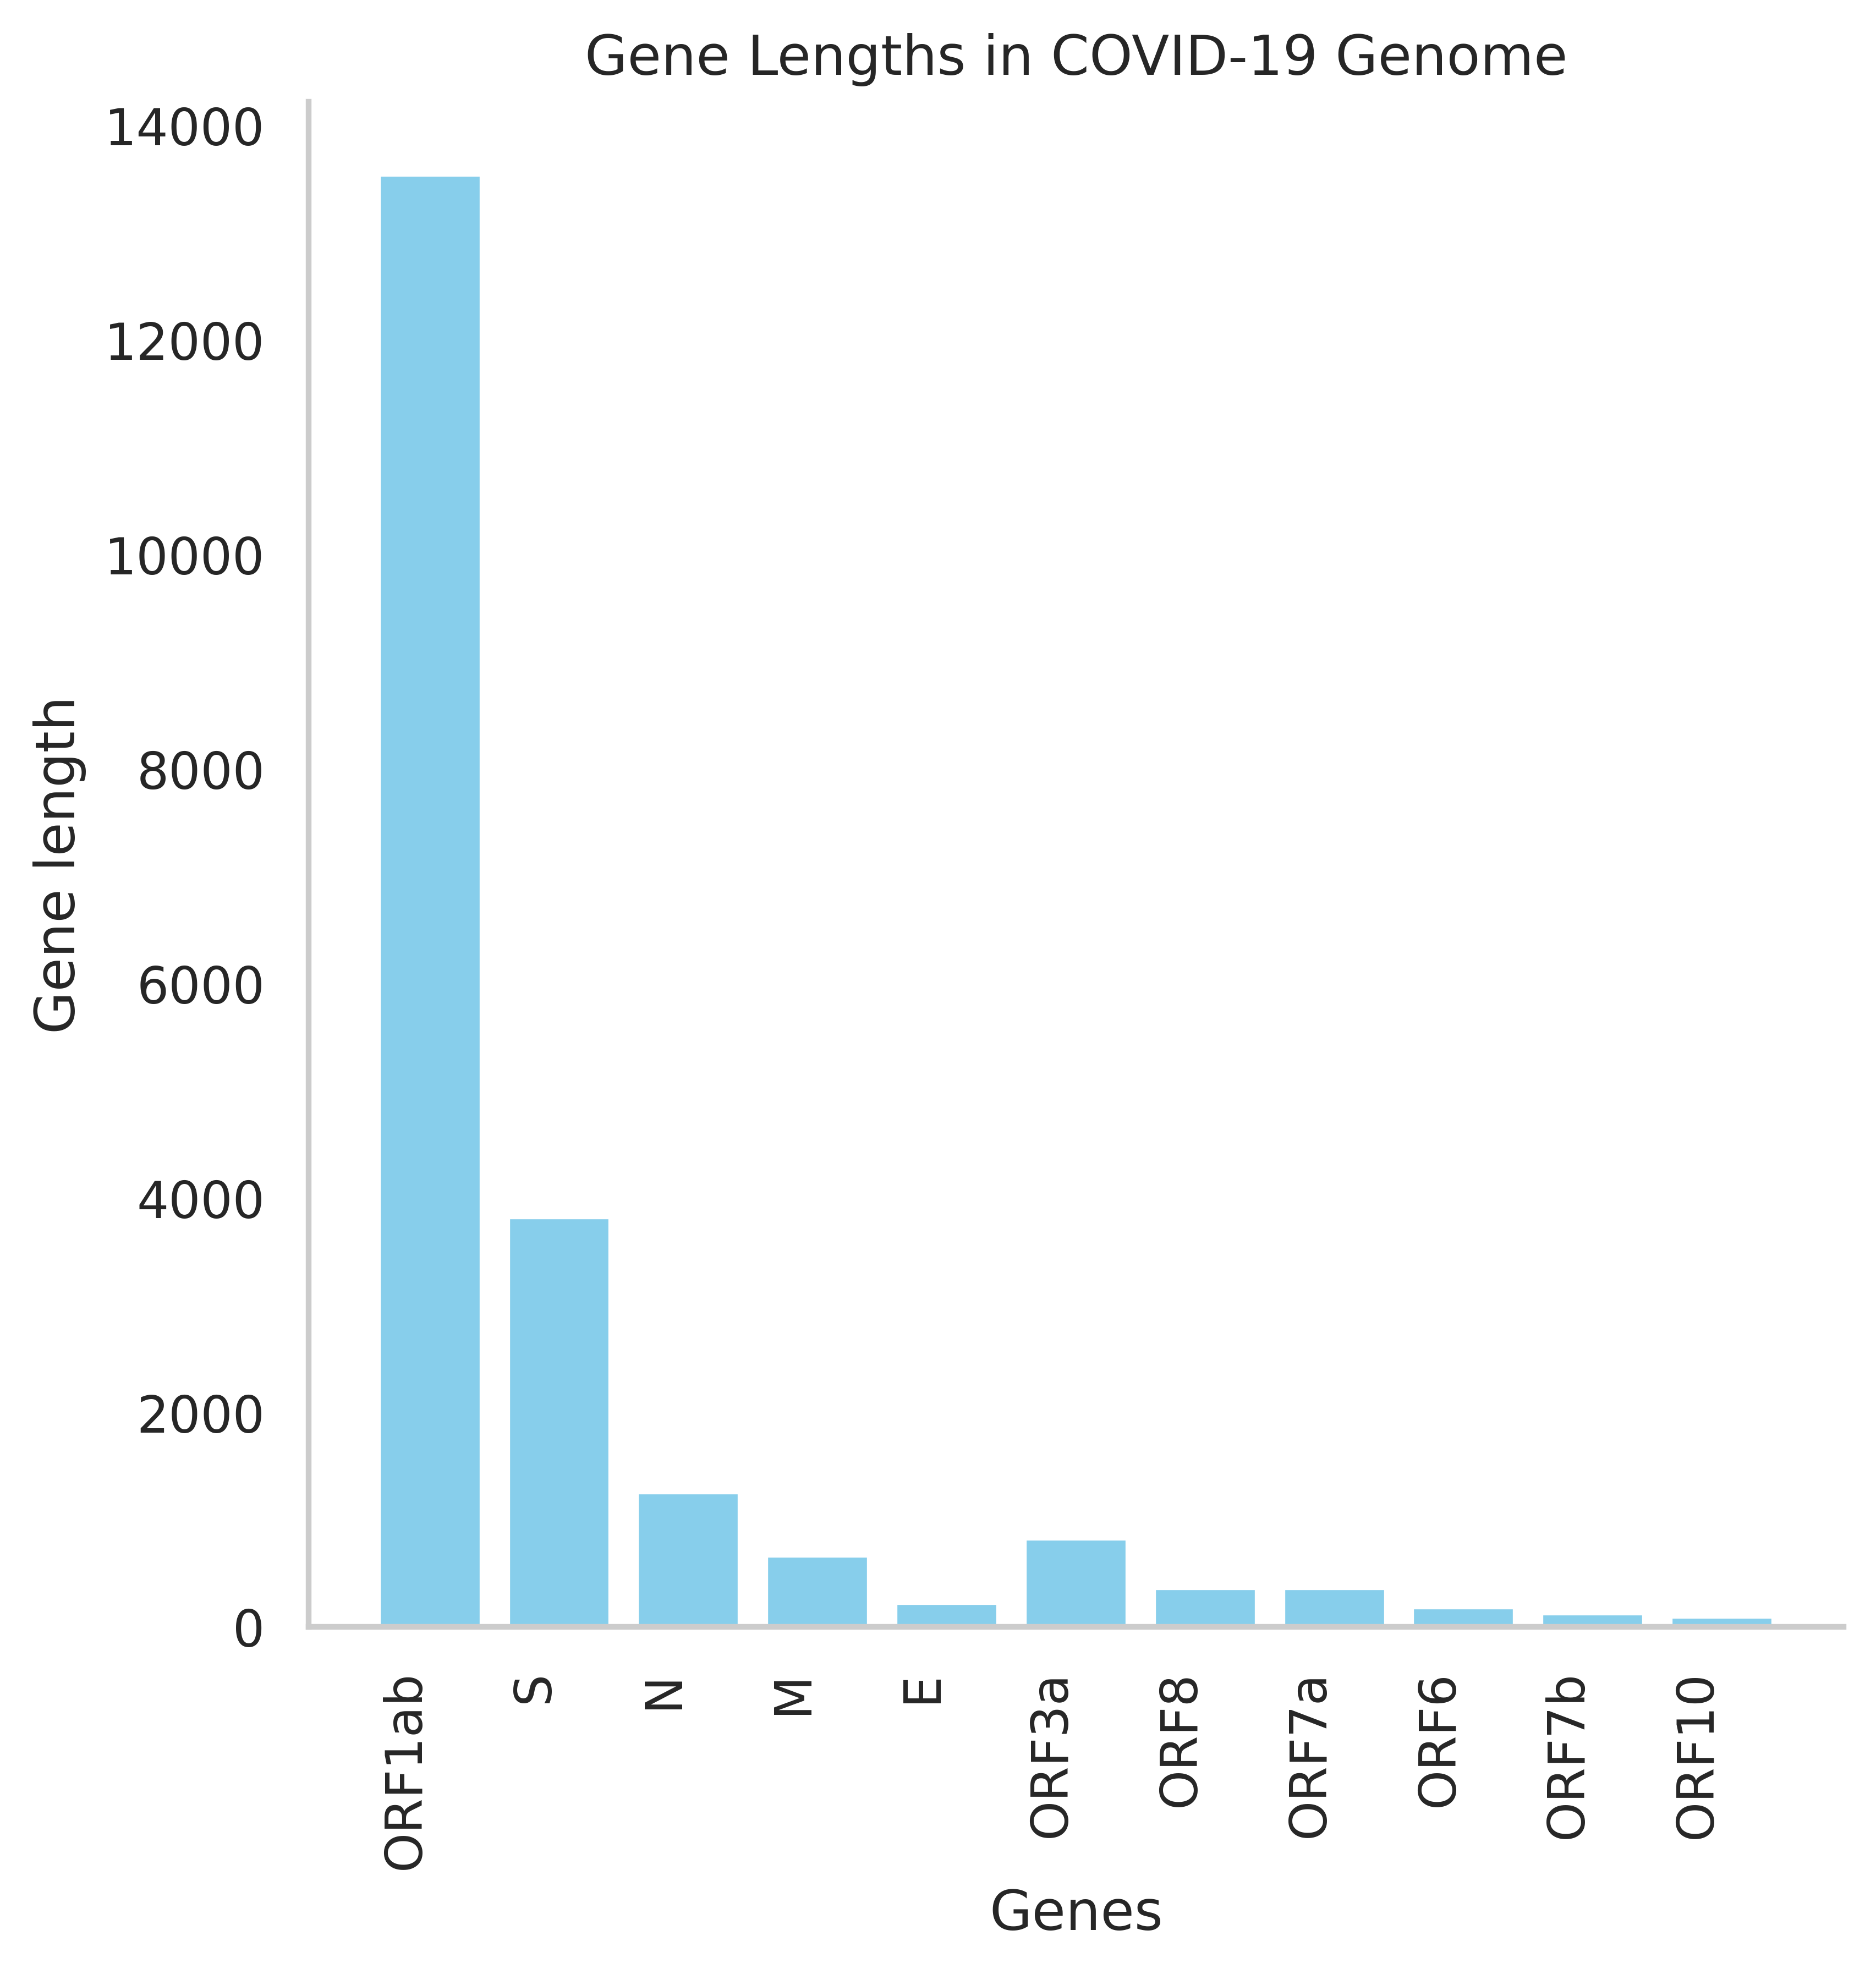

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utility

# Data
data = {
    'Genes': ['ORF1ab', 'S', 'N', 'M', 'E', 'ORF3a', 'ORF8', 'ORF7a', 'ORF6', 'ORF7b', 'ORF10'],
    'Gene length': [13541, 3821, 1259, 668, 227, 827, 365, 365, 185, 131, 99]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(dpi=600, figsize=(6, 6))
#fig, ax = plt.subplots(1,1, dpi = 600, figsize = (2.1,2.1))
plt.bar(df['Genes'], df['Gene length'], color='skyblue')
# ax = utility.box_plot(data = df, x = 'Genes', y='Gene length', ax = ax)
# ax = utility.custom_figure_axis(ax=ax, fontsize = 3, rotation=0, show_ticks=True)
#ax = sns.boxplot(x='Genes', y='Gene length', data=df, palette='viridis', ax=ax)
plt.xlabel('Genes')
plt.ylabel('Gene length')
plt.title('Gene Lengths in COVID-19 Genome')
plt.xticks(rotation=90, ha='right')
#plt.tight_layout()
#Remove top and right spines,
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Remove background lines
plt.grid(False)
plt.show()
#plt.savefig("11.pdf", dpi =600)

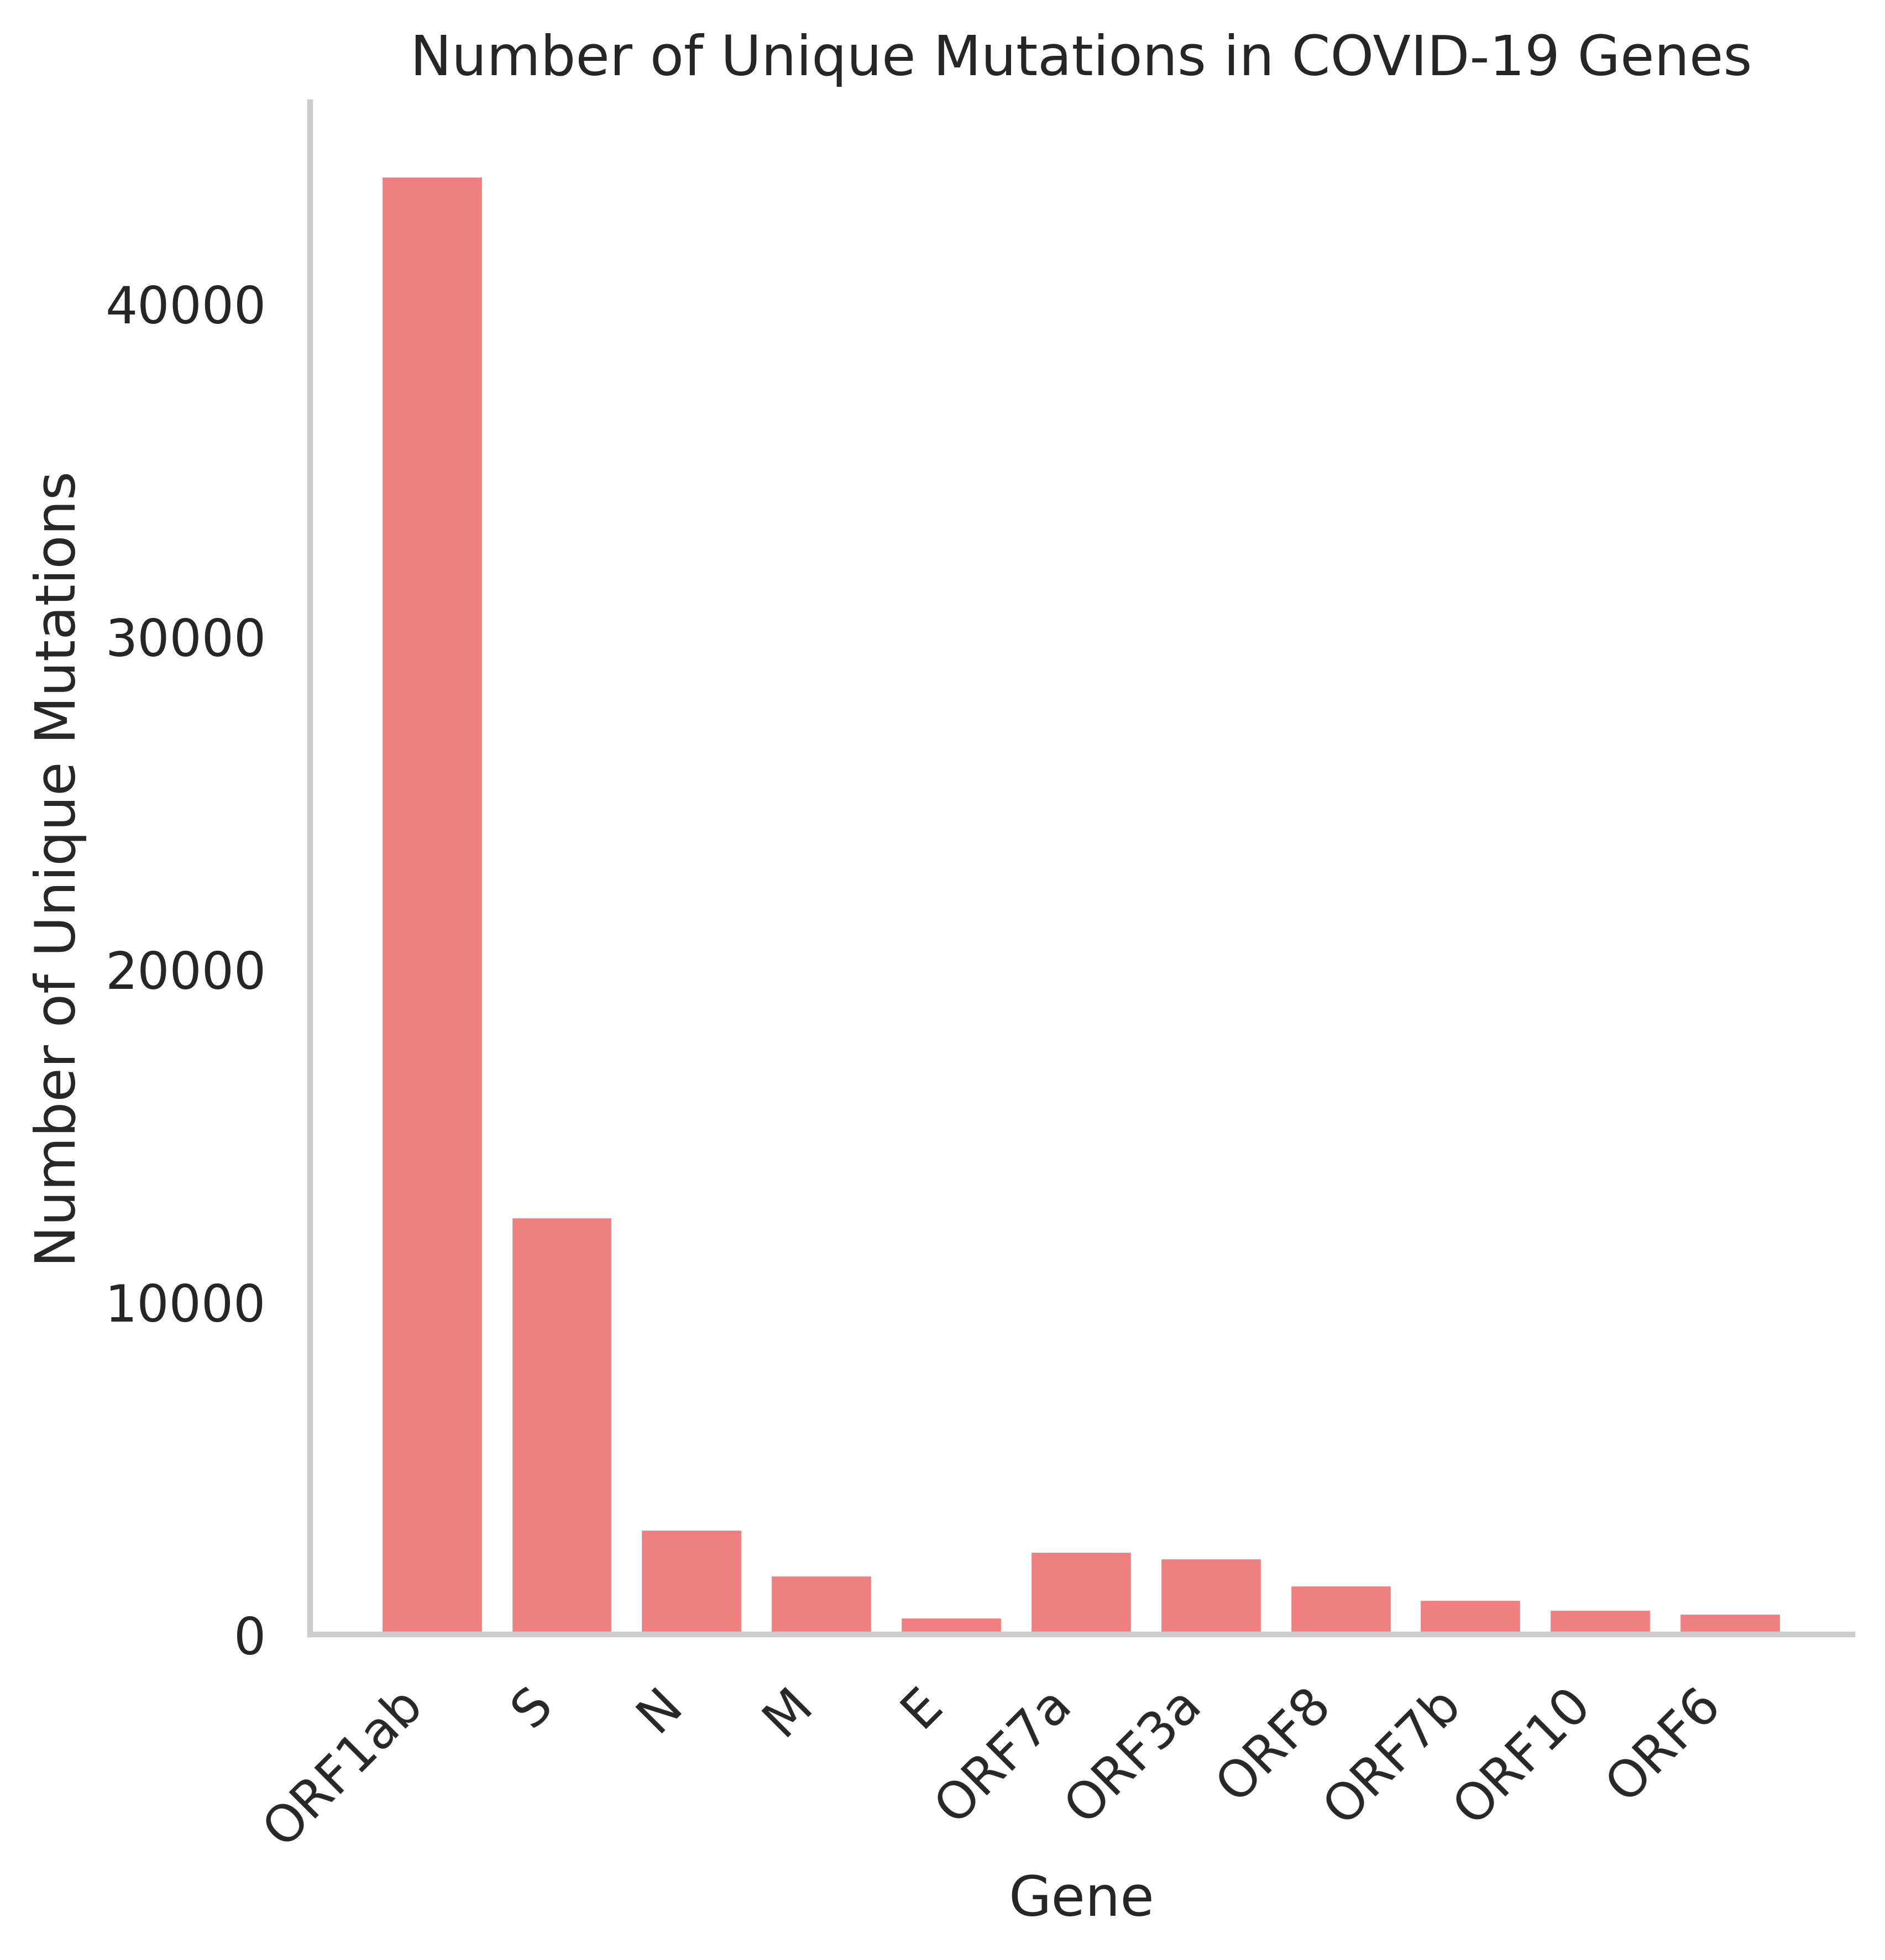

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Gene': ['ORF1ab', 'S', 'N', 'M', 'E', 'ORF7a', 'ORF3a', 'ORF8', 'ORF7b', 'ORF10', 'ORF6'],
    'Number of unique mutations': [43849, 12582, 3203, 1817, 563, 2539, 2330, 1521, 1082, 789, 670]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(dpi=600, figsize=(6, 6))
plt.bar(df['Gene'], df['Number of unique mutations'], color='lightcoral')
plt.xlabel('Gene')
plt.ylabel('Number of Unique Mutations')
plt.title('Number of Unique Mutations in COVID-19 Genes')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
#Remove top and right spines,
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Remove background lines
plt.grid(False)
plt.show()
#plt.savefig("12.pdf", dpi =600)

Mann-Whitney U Test p-value for Structural in VOC/VOI vs Controls: 0.05773572295632287
Mann-Whitney U Test p-value for Non-structural in VOC/VOI vs Controls: 0.8434995528963368
Mann-Whitney U Test p-value for Accessory in VOC/VOI vs Controls: 0.5434683305511515


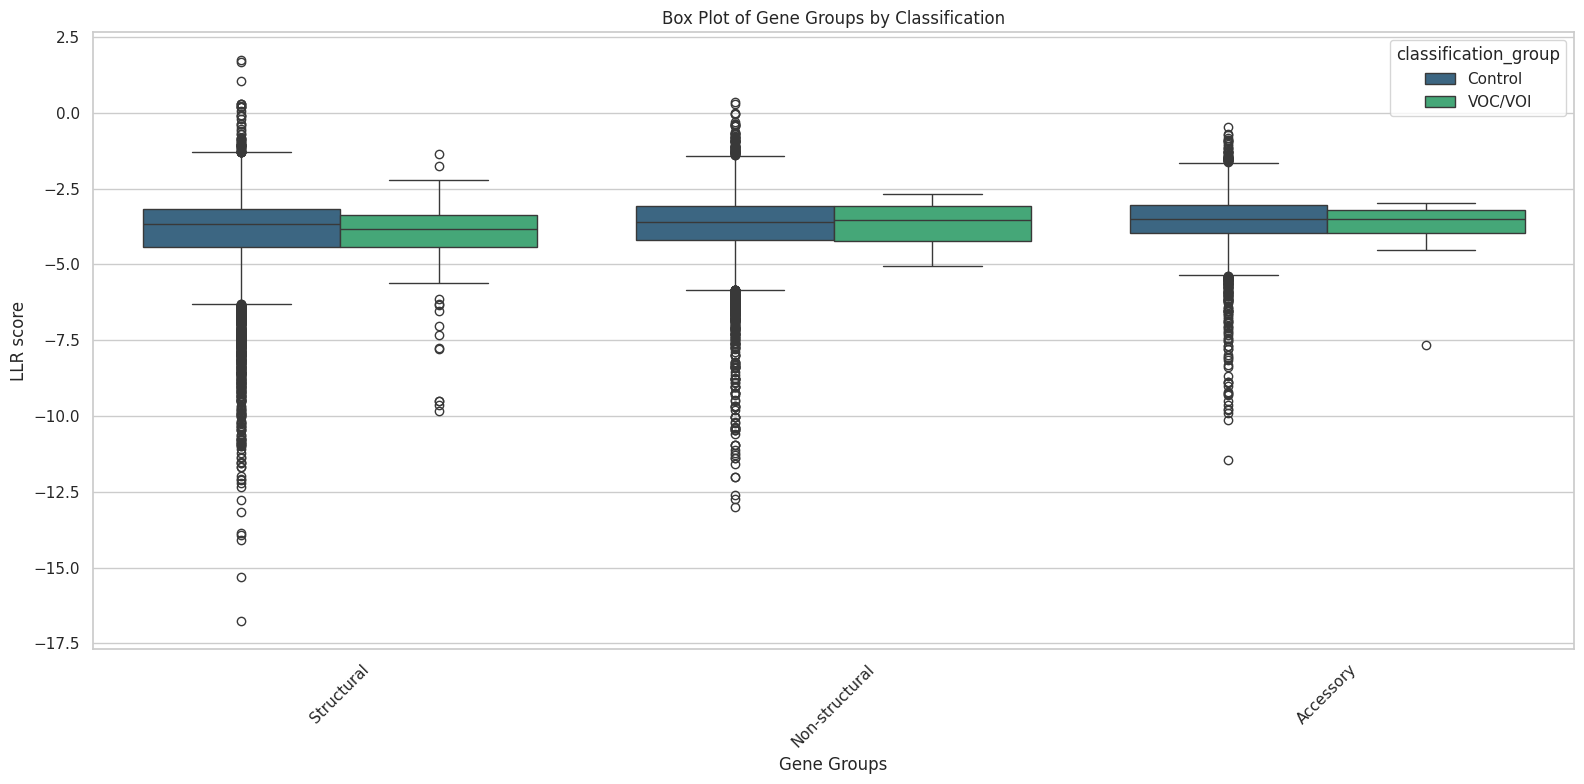

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Assuming 'data' is your dataset
df = pd.read_excel("/raid/home/smrutip/smruti_project/all_genes_esm_scores.xlsx")
#df = final_data.copy()
# Create a new column 'classification_group' to categorize classifications
df['classification_group'] = df['Classification'].apply(lambda x: 'VOC/VOI' if x in ['VOC', 'VOI'] else 'Control')
    
# Define gene groups
structural_genes = ['S', 'E', 'M', 'N']
non_structural_gene = ['ORF1ab']
accessory_genes = df['Gene'].unique()
for gene in structural_genes + non_structural_gene:
    accessory_genes = accessory_genes[accessory_genes != gene]
    
# Map genes to groups
gene_group_mapping = {}
for gene in structural_genes:
    gene_group_mapping[gene] = 'Structural'
    gene_group_mapping[non_structural_gene[0]] = 'Non-structural'
    for gene in accessory_genes:
        gene_group_mapping[gene] = 'Accessory'
    
# Add a new column 'Gene_Group' to the DataFrame
df['Gene_Group'] = df['Gene'].map(gene_group_mapping)
    
# Using seaborn for a more visually appealing plot
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
    
# Define the order of classification groups
classification_order = ['Control', 'VOC/VOI']
    
# Define the order of gene groups within each classification group
gene_group_order_within_class = ['Structural', 'Non-structural', 'Accessory']
    
# Create a box plot with classification groups and gene groups
sns.boxplot(x='Gene_Group', y='esm_score', hue='classification_group', data=df, order=gene_group_order_within_class, palette='viridis', hue_order=classification_order)
    
# Adding labels and title
plt.xlabel('Gene Groups')
plt.ylabel('LLR score')
plt.title('Box Plot of Gene Groups by Classification')
    
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
    
# Perform statistical tests for each gene group
for gene_group in gene_group_order_within_class:
    gene_group_data = df[df['Gene_Group'] == gene_group]
    voc_voi_data = gene_group_data[gene_group_data['classification_group'] == 'VOC/VOI']['esm_score']
    controls_data = gene_group_data[gene_group_data['classification_group'] == 'Control']['esm_score']
    
    # Perform Mann-Whitney U test
    statistic, p_value = mannwhitneyu(voc_voi_data, controls_data, alternative='two-sided')
    print(f"Mann-Whitney U Test p-value for {gene_group} in VOC/VOI vs Controls:", p_value)

# Display the plot
plt.tight_layout()
plt.show()

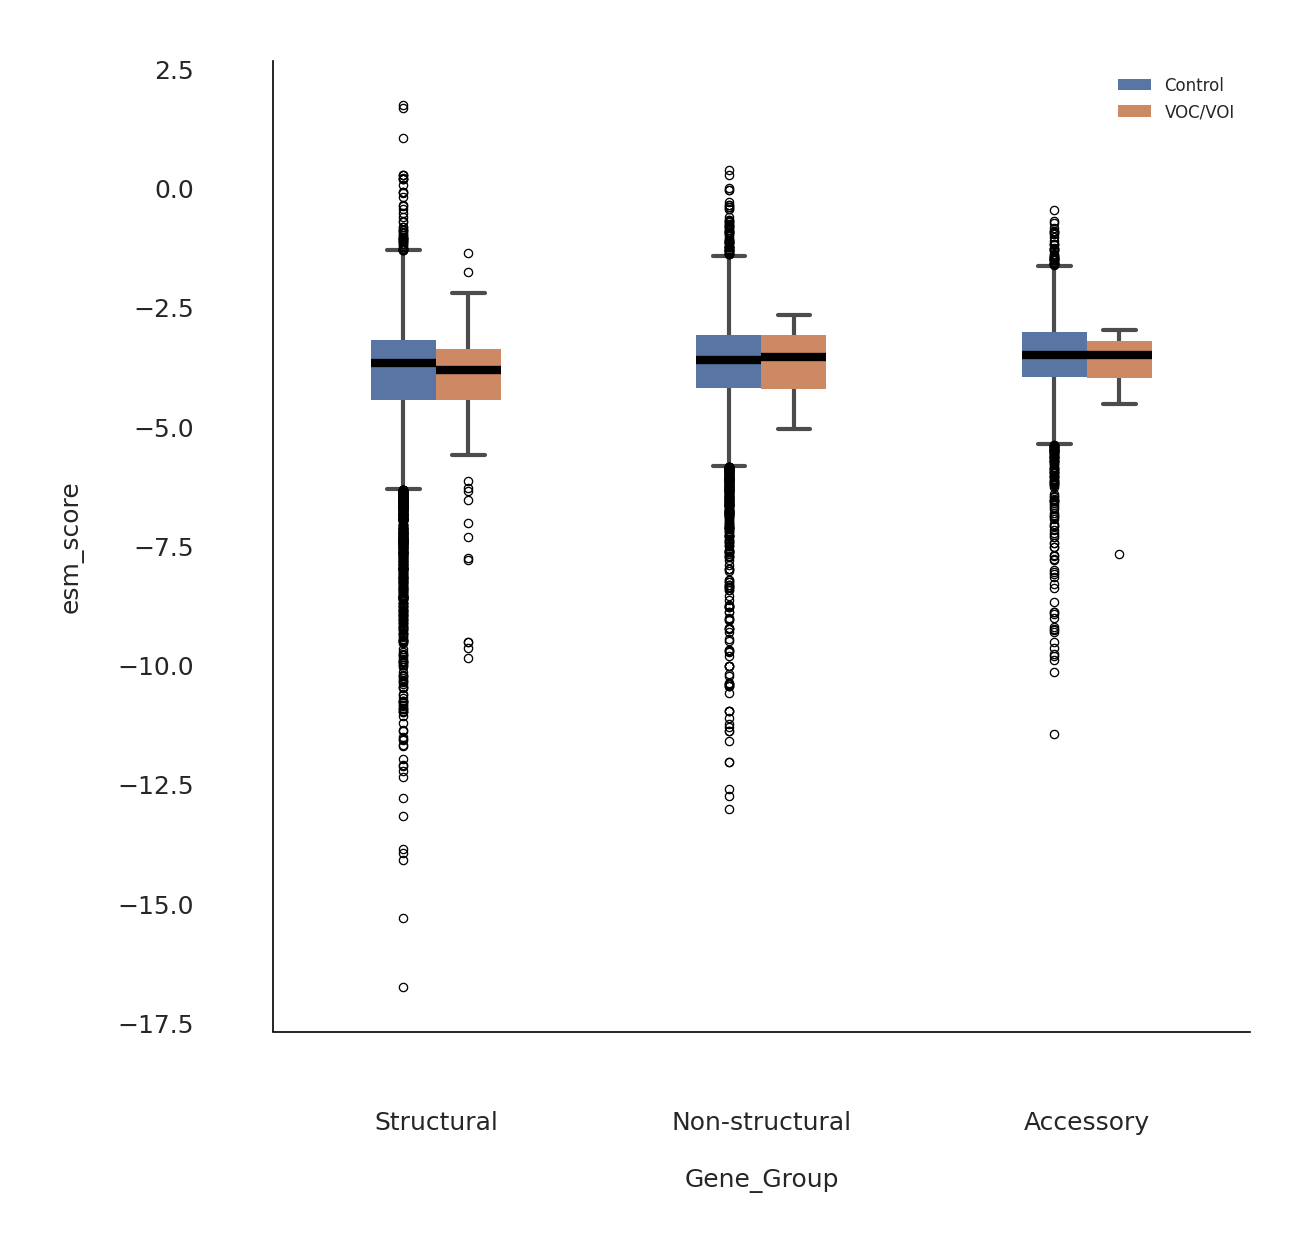

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import utility

# Assuming 'data' is your dataset
df = pd.read_excel("/raid/home/smrutip/smruti_project/all_genes_esm_scores.xlsx")
#df = final_data.copy()
# Create a new column 'classification_group' to categorize classifications
df['classification_group'] = df['Classification'].apply(lambda x: 'VOC/VOI' if x in ['VOC', 'VOI'] else 'Control')
    
# Define gene groups
structural_genes = ['S', 'E', 'M', 'N']
non_structural_gene = ['ORF1ab']
accessory_genes = df['Gene'].unique()
for gene in structural_genes + non_structural_gene:
    accessory_genes = accessory_genes[accessory_genes != gene]
    
# Map genes to groups
gene_group_mapping = {}
for gene in structural_genes:
    gene_group_mapping[gene] = 'Structural'
gene_group_mapping[non_structural_gene[0]] = 'Non-structural'
for gene in accessory_genes:
        gene_group_mapping[gene] = 'Accessory'
    
# Add a new column 'Gene_Group' to the DataFrame
df['Gene_Group'] = df['Gene'].map(gene_group_mapping)
    
# # Using seaborn for a more visually appealing plot
# sns.set(style="whitegrid")
# plt.figure(figsize=(16, 8))
    
# # Define the order of classification groups
# classification_order = ['Control', 'VOC/VOI']
    
# # Define the order of gene groups within each classification group
# gene_group_order_within_class = ['Structural', 'Non-structural', 'Accessory']

fig, ax = plt.subplots(1,1, dpi = 600, figsize = (2.1,2.1))

ax = utility.box_plot(data = df, x = "Gene_Group", y='esm_score', hue='classification_group', ax = ax)
ax = utility.custom_figure_axis(ax=ax, fontsize = 3, rotation=0, show_ticks=True)
ax.legend(fontsize=2, frameon=False)

#plt.savefig("2.pdf", dpi =600)

# Using seaborn for a more visually appealing plot
#sns.set(style="whitegrid")
#plt.figure(figsize=(16, 8))
    
# # Create a box plot with classification groups and gene groups
# sns.boxplot(x='Gene_Group', y='accumulated_gain', hue='classification_group', data=df, order=gene_group_order_within_class, palette='viridis', hue_order=classification_order)
    
# # Adding labels and title
# plt.xlabel('Gene Groups')
# plt.ylabel('Accumulated Gain')
# plt.title('Box Plot of Gene Groups by Classification')
    
# # Rotate x-axis labels for better visibility
# plt.xticks(rotation=45)
    
# # Perform statistical tests for each gene group
# for gene_group in gene_group_order_within_class:
#     gene_group_data = df[df['Gene_Group'] == gene_group]
#     voc_voi_data = gene_group_data[gene_group_data['classification_group'] == 'VOC/VOI']['accumulated_gain']
#     controls_data = gene_group_data[gene_group_data['classification_group'] == 'Control']['accumulated_gain']
    
#     # Perform Mann-Whitney U test
#     statistic, p_value = mannwhitneyu(voc_voi_data, controls_data, alternative='two-sided')
#     print(f"Mann-Whitney U Test p-value for {gene_group} in VOC/VOI vs Controls:", p_value)

# # Display the plot
# plt.tight_layout()
# plt.show()

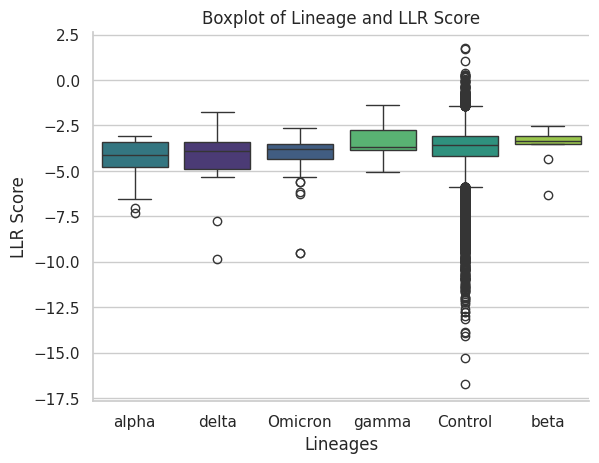

Mann-Whitney U test between delta and Omicron:
U Statistic: 340.0, p-value: 0.9810526844046821
No significant difference found.
Mann-Whitney U test between delta and alpha:
U Statistic: 102.0, p-value: 0.7984404008799949
No significant difference found.
Mann-Whitney U test between delta and Control:
U Statistic: 104505.0, p-value: 0.21034519182492706
No significant difference found.
Mann-Whitney U test between delta and gamma:
U Statistic: 63.0, p-value: 0.19591942262413964
No significant difference found.
Mann-Whitney U test between delta and beta:
U Statistic: 39.0, p-value: 0.1028132599992334
No significant difference found.
Mann-Whitney U test between Omicron and alpha:
U Statistic: 501.0, p-value: 0.5528860492641112
No significant difference found.
Mann-Whitney U test between Omicron and Control:
U Statistic: 496412.0, p-value: 0.006391419175302367
The difference is statistically significant.
Mann-Whitney U test between Omicron and gamma:
U Statistic: 294.0, p-value: 0.06513441494

In [18]:
# Read Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

sample = pd.read_excel("/raid/home/smrutip/smruti_project/lineage_vs_LLR.xlsx")
                       
df = sample.copy()
    
# Calculate median gain score for each lineage group
median_gain_scores = df.groupby('Lineage')['esm_score'].median().sort_values()
    
# Create boxplot
sns.boxplot(x='Lineage', y='esm_score', data=df, order=median_gain_scores.index, hue='Lineage', palette='viridis')
plt.title('Boxplot of Lineage and LLR Score')
plt.xlabel('Lineages')
plt.ylabel('LLR Score')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
    
# Perform Mann-Whitney U tests for all possible combinations
lineages = df['Lineage'].unique()
for i in range(len(lineages)):
    for j in range(i+1, len(lineages)):
        lineage1 = lineages[i]
        lineage2 = lineages[j]
        data1 = df[df['Lineage'] == lineage1]['esm_score']
        data2 = df[df['Lineage'] == lineage2]['esm_score']
        stat, p_value = mannwhitneyu(data1, data2)
        print(f"Mann-Whitney U test between {lineage1} and {lineage2}:")
        print(f"U Statistic: {stat}, p-value: {p_value}")
        if p_value < 0.05:
            print("The difference is statistically significant.")
        else:
            print("No significant difference found.")
    
# Perform Kruskal-Wallis test
lineages = df['Lineage'].unique()
data = [df[df['Lineage'] == lineage]['esm_score'] for lineage in lineages]
stat, p_value = kruskal(*data)
print("Kruskal-Wallis Test:")
print(f"H statistic: {stat}, p-value: {p_value}")
    
# Interpret the results
if p_value < 0.05:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

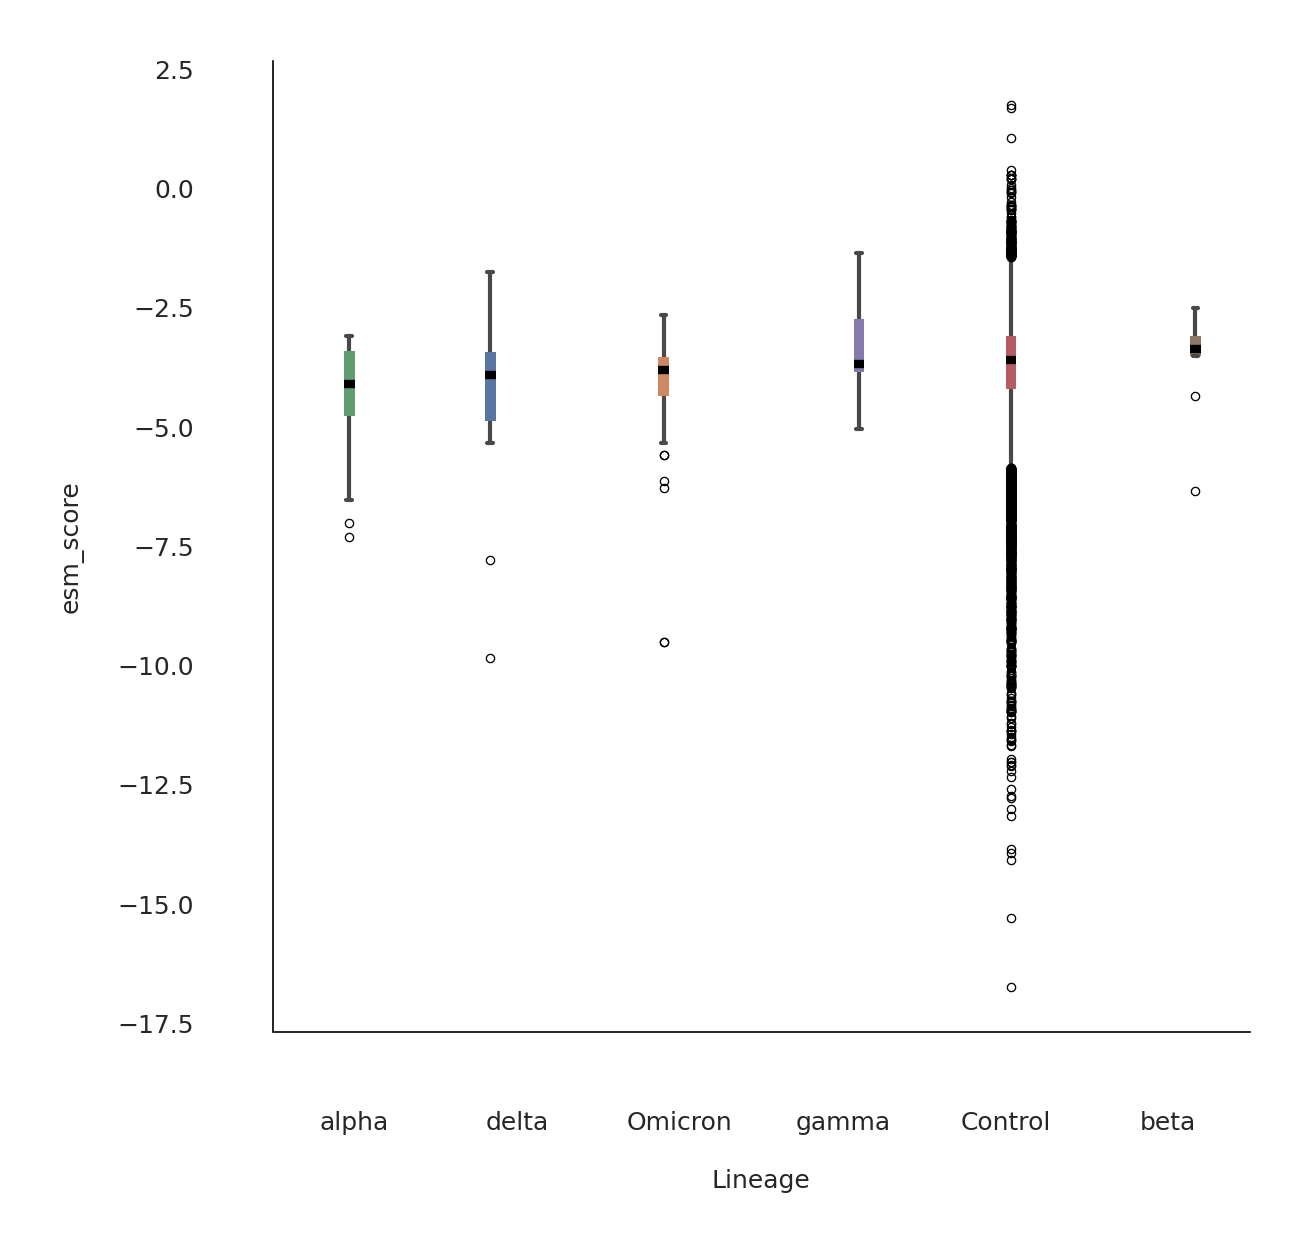

In [19]:
# Read Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

sample = pd.read_excel("/raid/home/smrutip/smruti_project/lineage_vs_LLR.xlsx")
                       
df = sample.copy()
    
# Calculate median gain score for each lineage group
median_gain_scores = df.groupby('Lineage')['esm_score'].median().sort_values()

fig, ax = plt.subplots(1,1, dpi = 600, figsize = (2.1,2.1))
    
ax = utility.box_plot(data = df, x = "Lineage", y='esm_score', hue='Lineage', ax = ax)
ax = utility.custom_figure_axis(ax=ax, fontsize = 3, rotation=0, show_ticks=True)
#ax.legend(fontsize=2, frameon=False)\n",

#plt.savefig(\"4.pdf\", dpi =600)\n",
    
# # Create boxplot
# sns.boxplot(x='Lineage', y='accumulated_gain', data=df, order=median_gain_scores.index, hue='Lineage', palette='viridis')
# plt.title('Boxplot of Lineage and Gain Score')
# plt.xlabel('Lineages')
# plt.ylabel('Gain Score')

# # Remove top and right spines
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# plt.show()
    
# # Perform Mann-Whitney U tests for all possible combinations
# lineages = df['Lineage'].unique()
# for i in range(len(lineages)):
#     for j in range(i+1, len(lineages)):
#         lineage1 = lineages[i]
#         lineage2 = lineages[j]
#         data1 = df[df['Lineage'] == lineage1]['accumulated_gain']
#         data2 = df[df['Lineage'] == lineage2]['accumulated_gain']
#         stat, p_value = mannwhitneyu(data1, data2)
#         print(f"Mann-Whitney U test between {lineage1} and {lineage2}:")
#         print(f"U Statistic: {stat}, p-value: {p_value}")
#         if p_value < 0.05:
#             print("The difference is statistically significant.")
#         else:
#             print("No significant difference found.")
    
# # Perform Kruskal-Wallis test
# lineages = df['Lineage'].unique()
# data = [df[df['Lineage'] == lineage]['accumulated_gain'] for lineage in lineages]
# stat, p_value = kruskal(*data)
# print("Kruskal-Wallis Test:")
# print(f"H statistic: {stat}, p-value: {p_value}")
    
# # Interpret the results
# if p_value < 0.05:
#     print("There is a significant difference between the groups.")
# else:
#     print("There is no significant difference between the groups.")

Code for AG vs mutation frequency

Use the below code for all genes to get the respective plots

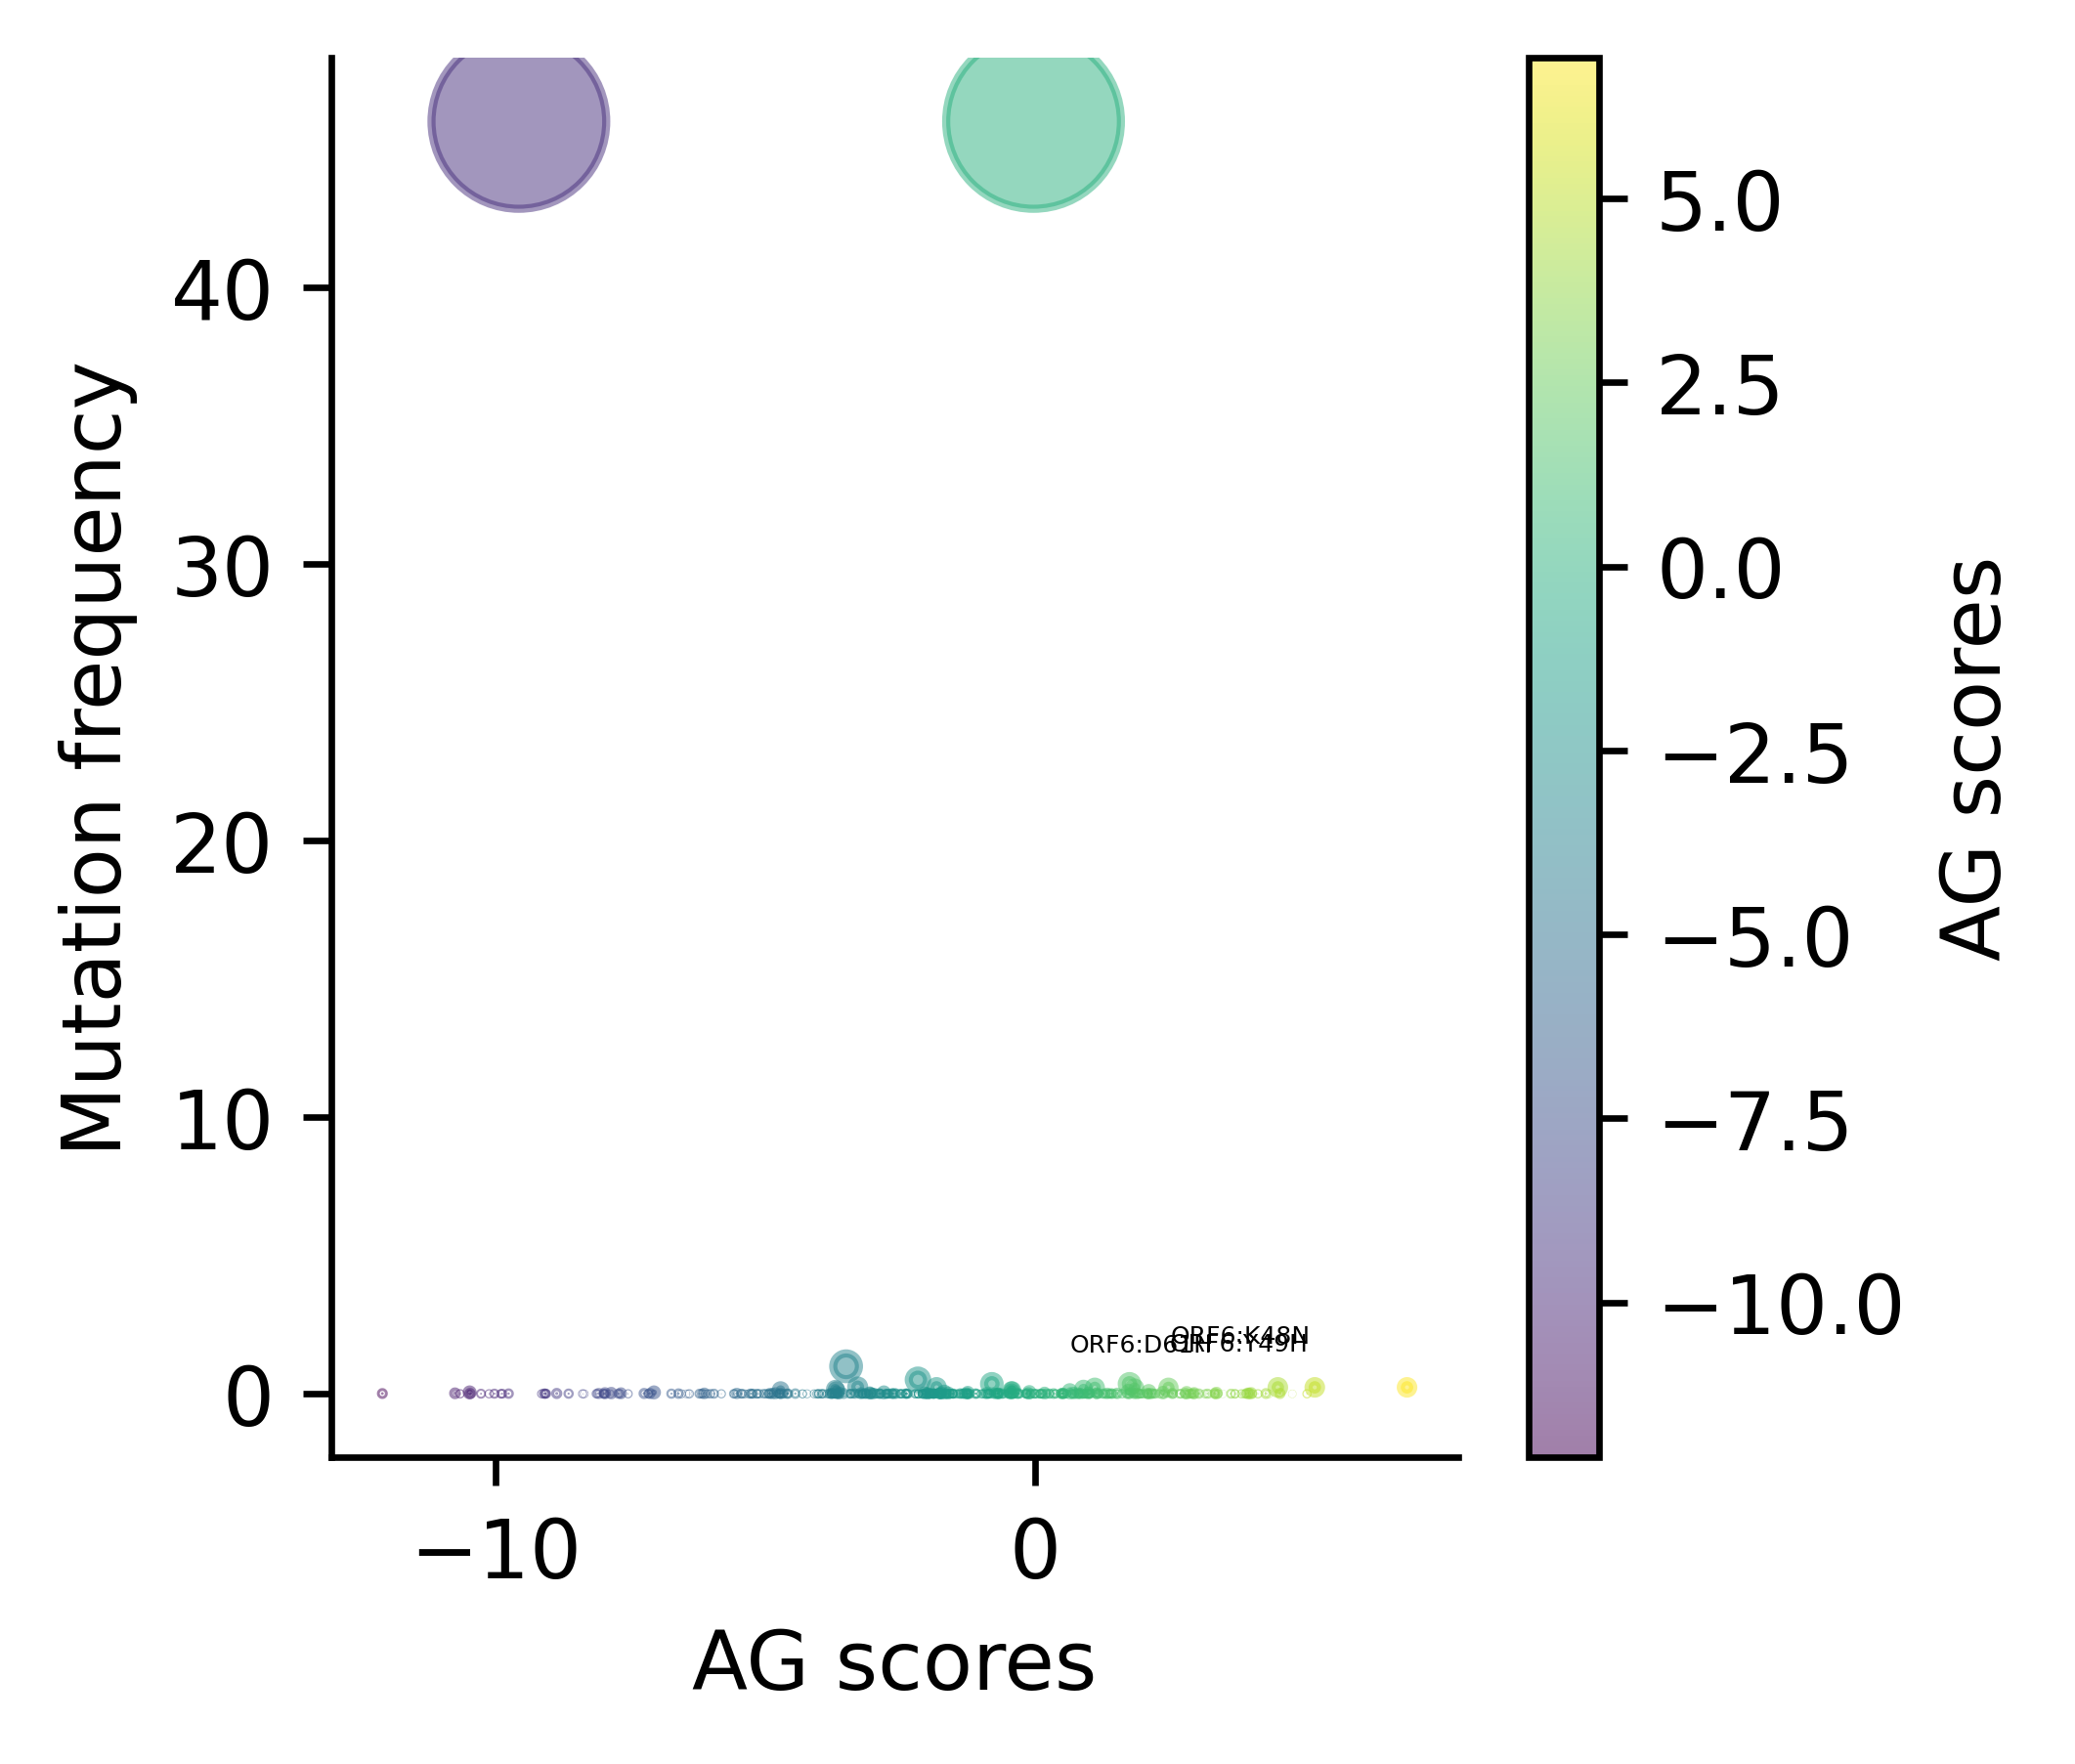

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

# Read data from Excel file
df = pd.read_excel("/raid/home/smrutip/smruti_project/orf6_ag.xlsx")

# Extract the mutation frequency and ESM score data into separate columns
mut_freq = df['mutation freq']
AG_scores = df['accumulated_gain']
mutation = df['mutation_name']

plt.figure(dpi=600, figsize=(3.1, 3.1))

#fig, ax = plt.subplots(1, 1, figsize = (2.1, 2.1), dpi = 600)

# Define colors based on AG scores
colors = AG_scores

# Define sizes based on mutation frequency
sizes = mut_freq * 10  # Adjust the multiplier to control the size of the dots

# Plot the mutation frequency vs ESM score with color gradient based on AG score and size based on mutation frequency
plt.scatter(AG_scores, mut_freq, c=colors, cmap='viridis', marker='o', label='AG_scores', alpha=0.5, s=sizes)
#plt.axhline(y=0, color='k', linestyle='--', linewidth=1, label='Zero Line')

# Filter mutations with status marked as 'important'
df_important = df[df['Status'] == 'Important']

for i, mut_name in enumerate(df_important['mutation_name']):
    idx = df.index[df['mutation_name'] == mut_name].tolist()[0]  # Get index of 'important' mutation in original DataFrame
    plt.annotate(mut_name, (AG_scores[idx], mut_freq[idx]), textcoords="offset points", xytext=(5, 5), ha='left', fontsize=3, rotation=360)

# Add a color bar
cbar = plt.colorbar()
cbar.set_label('AG scores')

# Add a legend
#plt.legend()

# Set the axis labels
plt.xlabel('AG scores')
plt.ylabel('Mutation frequency')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save the plot as a PDF file
#plt.savefig("11.pdf", dpi=600)

# Show the plot
plt.show()

In [4]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd 
# import numpy as np

# # Read data from Excel file
# df = pd.read_excel("/raid/home/smrutip/smruti_project/orf3a_llr.xlsx")

# # Extract the mutation frequency and ESM score data into separate columns
# mut_freq = df['mutation freq']
# esm_scores = df['esm_score']
# mutation = df['mutation']

# plt.figure(dpi=600, figsize=(3.1, 3.1))

# #fig, ax = plt.subplots(1, 1, figsize = (2.1, 2.1), dpi = 600)

# # Define colors based on AG scores
# colors = esm_scores

# # Define sizes based on mutation frequency
# sizes = mut_freq * 10  # Adjust the multiplier to control the size of the dots

# # Plot the mutation frequency vs ESM score with color gradient based on AG score and size based on mutation frequency
# plt.scatter(esm_scores, mut_freq, c=colors, cmap='viridis', marker='o', label='esm_scores', alpha=0.5, s=sizes)
# #plt.axhline(y=0, color='k', linestyle='--', linewidth=1, label='Zero Line')

# # Filter mutations with status marked as 'important'
# df_important = df[df['Status'] == 'Important']

# for i, mut_name in enumerate(df_important['mutation']):
#     idx = df.index[df['mutation'] == mut_name].tolist()[0]  # Get index of 'important' mutation in original DataFrame
#     #plt.annotate(mut_name, (AG_scores[idx], mut_freq[idx]), textcoords="offset points", xytext=(5, 5), ha='left', fontsize=3, rotation=360)

# # Add a color bar
# cbar = plt.colorbar()
# cbar.ax.set_yticklabels([])
# #cbar.set_label('AG scores')

# # Add a legend
# #plt.legend()

# # Set the axis labels
# #plt.xlabel('AG scores')
# #plt.ylabel('Mutation frequency')


# # Remove top and right spines
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# # Remove tick labels on both axes
# plt.gca().set_xticklabels([])
# plt.gca().set_yticklabels([])

# # Save the plot as a PDF file
# #plt.savefig("11.pdf", dpi=600)

# # Show the plot
# plt.show()

Code for LLR vs mutation frequency

Use the below code for all genes to get the respective plots

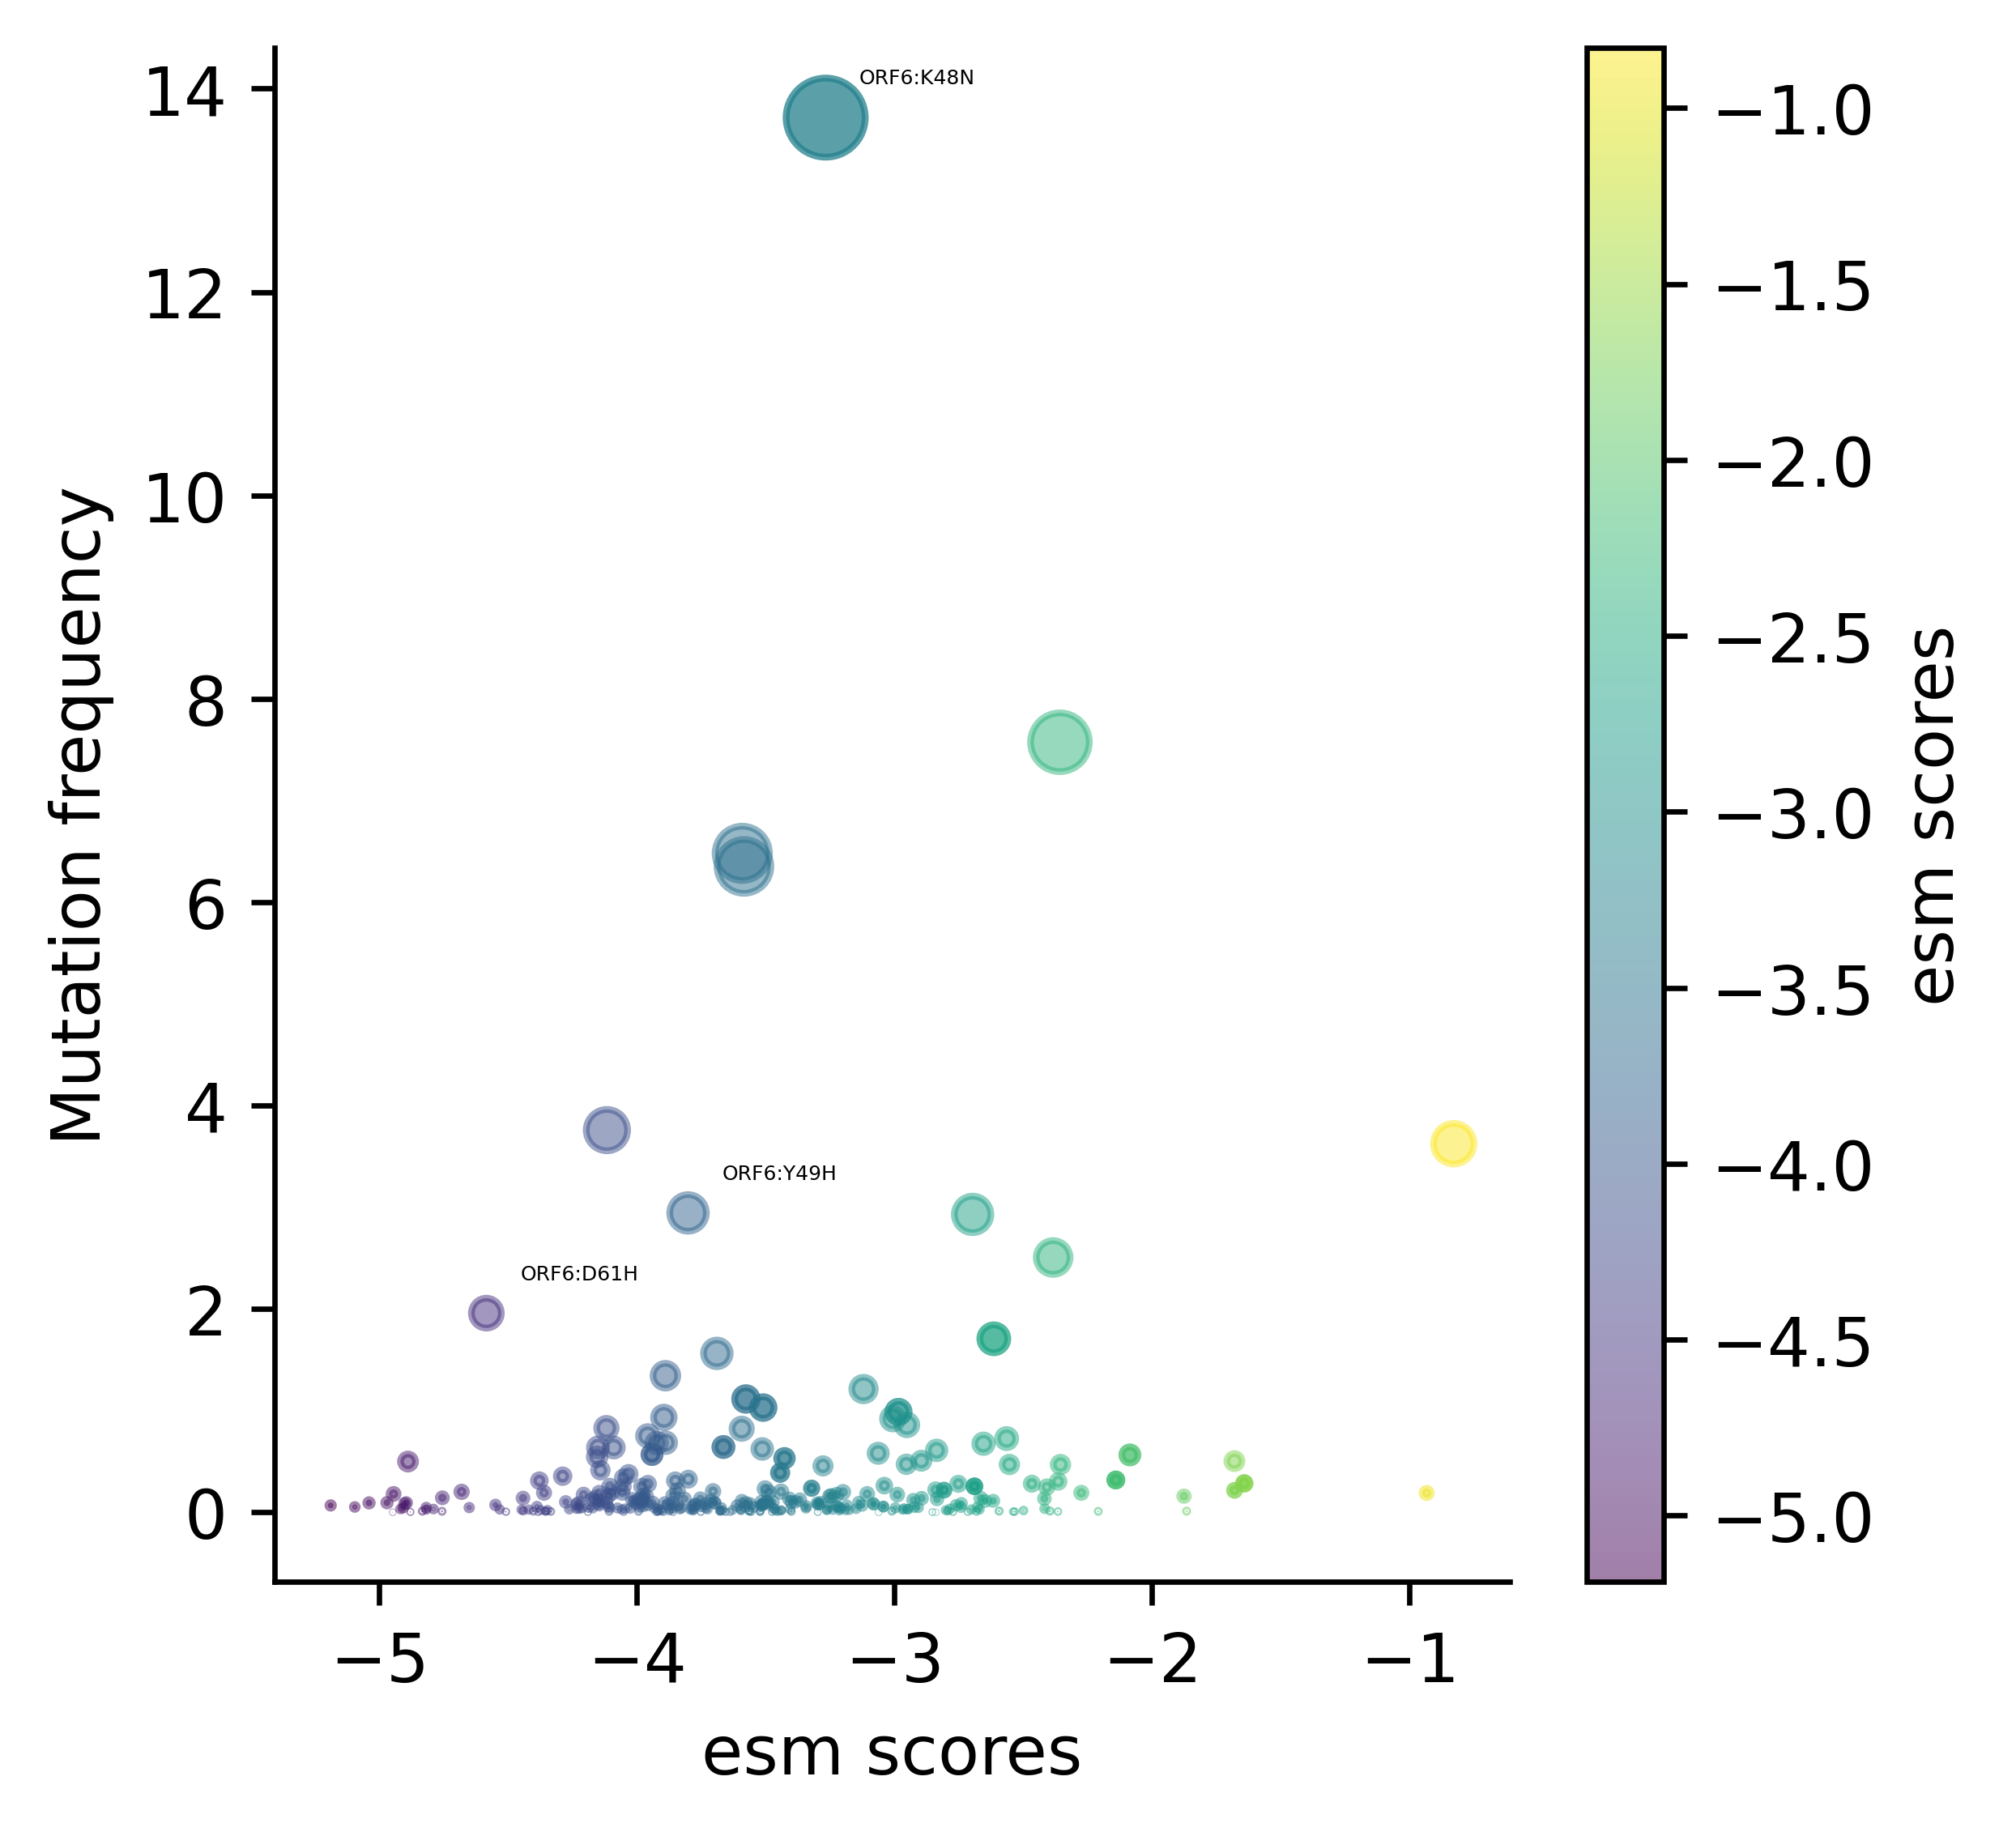

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

# Read data from Excel file
df = pd.read_excel("/raid/home/smrutip/smruti_project/orf6_llr.xlsx")

# Extract the mutation frequency and ESM score data into separate columns
mut_freq = df['mutation freq']
esm_scores = df['esm_score']
mutation = df['mutation']

plt.figure(dpi=600, figsize=(4.1, 4.1))

#fig, ax = plt.subplots(1, 1, figsize = (2.1, 2.1), dpi = 600)

# Define colors based on AG scores
colors = esm_scores

# Define sizes based on mutation frequency
sizes = mut_freq * 10  # Adjust the multiplier to control the size of the dots

# Plot the mutation frequency vs ESM score with color gradient based on AG score and size based on mutation frequency
plt.scatter(esm_scores, mut_freq, c=colors, cmap='viridis', marker='o', label='esm_scores', alpha=0.5, s=sizes)
#plt.axhline(y=0, color='k', linestyle='--', linewidth=1, label='Zero Line')

# Filter mutations with status marked as 'important'
df_important = df[df['Status'] == 'Important']

for i, mut_name in enumerate(df_important['mutation']):
    idx = df.index[df['mutation'] == mut_name].tolist()[0]  # Get index of 'important' mutation in original DataFrame
    plt.annotate(mut_name, (esm_scores[idx], mut_freq[idx]), textcoords="offset points", xytext=(5, 5), ha='left', fontsize=3, rotation=360)

# Add a color bar
cbar = plt.colorbar()
cbar.set_label('esm scores')

# Add a legend
#plt.legend()

# Set the axis labels
plt.xlabel('esm scores')
plt.ylabel('Mutation frequency')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save the plot as a PDF file
#plt.savefig("11.pdf", dpi=600)

# Show the plot
plt.show()